Reference : https://www.kaggle.com/sauravmishra1710/covid-19-sars-cov-2-a-statistical-analysis by Saurav Mishra

# nCov - A Geo Statistical Analysis

 Let's do an Exploratory Analysis on the data we have so far

The data has been shared in kaggle @ https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset.

Real time data on everyday basis is also made available by the Johns Hopkins university @ https://docs.google.com/spreadsheets/d/1yZv9w9zRKwrGTaR-YzmAqMefw4wMlaXocejdxZaTs6w/htmlview?usp=sharing&sle=true#

In [1]:
# import the necessary libraries

import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown
import plotly.graph_objs as go
import plotly.offline as py
from plotly.subplots import make_subplots
import plotly.express as px
import pycountry
import folium
from folium import plugins


%config InlineBackend.figure_format = 'retina'
py.init_notebook_mode(connected = True)

# Utility Functions

'''Display markdown formatted out put like bold, italic bold etc.'''
def formatted_text(string):
    display(Markdown(string))

In [43]:
# Utility Plotting Funcions

def plotDailyReportedCasesOverTime(df, country):
    # Confirmed
    fig = px.bar(df, x = "Date", y = "Confirmed")
    layout = go.Layout(title = go.layout.Title(text = "Daily count of confirmed cases in" + country, x = 0.5),
                      font = dict(size = 14),
                      width = 800,
                      height = 500,
                      xaxis_title = "Date",
                      yaxis_title = "Confirmed cases")
    
    fig.update_layout(layout)
    fig.show()
    
    # deaths
    fig = px.bar(df, x = "Date", y = "Deaths")
    layout = go.Layout(title = go.layout.Title(text = "Daily count of reported deaths in" + country, x = 0.5),
                      font = dict(size = 14),
                                 width = 800,
                                 height= 500,
                                 xaxis_title = "Date",
                                 yaxis_title = "Deaths Reported")
    
    fig.update_layout(layout)
    fig.show()
    
    # recovered
    fig = px.bar(df, x = "Date", y = "Recovered")
    layout = go.Layout(title = go.layout.Title(text = "Daily count of recovered cases in" + country, x = 0.5),
                      font = dict(size = 14),
                      width = 800,
                      height = 500,
                      xaxis_title = "Date",
                      yaxis_title = "Recovered Cases")
    
    fig.update_layout(layout)
    fig.show()
    
    # active
    fig = px.bar(df, x = "Date", y = "Active")
    layout = go.Layout(title = go.layout.Title(text = "Daily count of active cases in" + country, x = 0.5),
                      font = dict(size = 14),
                      width = 800,
                      height = 500,
                      xaxis_title = "Date",
                      yaxis_title = "Active Cases")
    
    fig.update_layout(layout)
    fig.show()
    
   

In [44]:
# Cases over time
def scatterPlotCasesOverTime(df, country):
        plot = make_subplots(rows = 2, cols = 2, subplot_titles = ("Confirmed", "Deaths", "Recovered", "Active"))
        
        subPlot1 = go.Scatter(x = df['Date'],
                             y = df['Confirmed'],
                             name = "Confirmed",
                             line_color = 'orange',
                             opacity = 0.8)
        
        subPlot2 = go.Scatter(x = df['Date'],
                             y = df['Deaths'],
                             name = "Deaths",
                             line_color = 'red',
                             opacity = 0.8)
        
        subPlot3 = go.Scatter(x = df['Date'],
                             y = df['Recovered'],
                             name = "Recovered",
                             line_color = 'green',
                             opacity = 0.8)
        
        subPlot4 = go.Scatter(x = df['Date'],
                             y = df['Active'],
                             name = "Active",
                             line_color = 'blue',
                             opacity = 0.8)
        
        plot.append_trace(subPlot1, 1, 1)
        plot.append_trace(subPlot2, 1, 2)
        plot.append_trace(subPlot3, 2, 1)
        plot.append_trace(subPlot4, 2, 2)
        plot.update_layout(template = "ggplot2", title_text = country + '<b> - Spread of the nCov Over Time</b>')
        
        plot.show()

In [3]:
# Import the Data
nCoV_data = pd.read_csv("../kaggle/data/covid_19_data.csv")

# Data Glimpse
nCoV_data.head()

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0

In [4]:
# Data Info
nCoV_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68558 entries, 0 to 68557
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              68558 non-null  int64  
 1   ObservationDate  68558 non-null  object 
 2   Province/State   44125 non-null  object 
 3   Country/Region   68558 non-null  object 
 4   Last Update      68558 non-null  object 
 5   Confirmed        68558 non-null  float64
 6   Deaths           68558 non-null  float64
 7   Recovered        68558 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 4.2+ MB


- We would not need the Sno column for analysis. Let's drop the column.
- Also the 'Last Update' column contains date but is of type object. Let's convert the same to date type so that is can be used in a better way.
- The 'Province/State' column has 487 non-null values. This means there are some missing values. We could fill in these missing values with the corresponding 'Country' name.

In [5]:
# Convert 'Last Update' column to datetime object
nCoV_data['Last Update'] = nCoV_data['Last Update'].apply(pd.to_datetime)
nCoV_data['ObservationDate'] = nCoV_data['ObservationDate'].apply(pd.to_datetime)

# Also drop the 'SNo' and the 'Date' columns
nCoV_data.drop(['SNo'], axis = 1, inplace = True)

# Fill the missing values in 'Province/State' with the 'Country' name.
nCoV_data['Province/State'] = nCoV_data['Province/State'].replace(np.nan, nCoV_data['Country/Region'])

# Data Glimpse
nCoV_data.head()

ObservationDate Province/State  Country/Region         Last Update  \
0      2020-01-22          Anhui  Mainland China 2020-01-22 17:00:00   
1      2020-01-22        Beijing  Mainland China 2020-01-22 17:00:00   
2      2020-01-22      Chongqing  Mainland China 2020-01-22 17:00:00   
3      2020-01-22         Fujian  Mainland China 2020-01-22 17:00:00   
4      2020-01-22          Gansu  Mainland China 2020-01-22 17:00:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0

## Active Cases

In [6]:
# Active Case = confirmed - deaths - recovered
nCoV_data['Active'] = nCoV_data['Confirmed'] - nCoV_data['Deaths'] - nCoV_data['Recovered']

In [7]:
# Check the Data Info again
nCoV_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68558 entries, 0 to 68557
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ObservationDate  68558 non-null  datetime64[ns]
 1   Province/State   68558 non-null  object        
 2   Country/Region   68558 non-null  object        
 3   Last Update      68558 non-null  datetime64[ns]
 4   Confirmed        68558 non-null  float64       
 5   Deaths           68558 non-null  float64       
 6   Recovered        68558 non-null  float64       
 7   Active           68558 non-null  float64       
dtypes: datetime64[ns](2), float64(4), object(2)
memory usage: 4.2+ MB


In [8]:
# Let's rename the columns - 'Province/State' and 'Last Update' to remove the '/' and space respectively.
nCoV_data.rename(columns = {'Last Update': 'Last Update', 'Province/State': 'State', 
                            'Country/Region': 'Country', 'ObservationDate': 'Date'},
                 inplace = True)

# Data Glimpse
nCoV_data.head()

Date      State         Country         Last Update  Confirmed  \
0 2020-01-22      Anhui  Mainland China 2020-01-22 17:00:00        1.0   
1 2020-01-22    Beijing  Mainland China 2020-01-22 17:00:00       14.0   
2 2020-01-22  Chongqing  Mainland China 2020-01-22 17:00:00        6.0   
3 2020-01-22     Fujian  Mainland China 2020-01-22 17:00:00        1.0   
4 2020-01-22      Gansu  Mainland China 2020-01-22 17:00:00        0.0   

   Deaths  Recovered  Active  
0     0.0        0.0     1.0  
1     0.0        0.0    14.0  
2     0.0        0.0     6.0  
3     0.0        0.0     1.0  
4     0.0        0.0     0.0

In [9]:
# Let's check the total #Countries affected by nCoV

nCoV_Countries = nCoV_data['Country'].unique().tolist()
print('\n')
print(nCoV_Countries)
print("\n-----------------------------------------------------------------")
print("\nTotal countries affected by nCoV: ", len(nCoV_Countries))



['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan', 'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy', 'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt', 'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan', 'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia', 'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands', 'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania', 'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg', 'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic', 'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal', 'Andorra', 'Latvia', 'Morocco', 'Saudi Arabia', 'Senegal', 'Argentina', 'Chile', 'Jordan', 'Ukraine', 'Saint Barthelemy'

The virus has spread to a majority of countries outside of China over time affecting lakhs of people and causing severe damage / deaths to mankind. Thus the reson for categorizing this as a global pandemic by the WHO.

In [11]:
# Convert 'Mainland China' to 'China'
nCoV_data['Country'] = np.where(nCoV_data['Country'] == 'Mainland China', 'China', nCoV_data['Country'])

# Check the # countries agian
nCoV_Countries = nCoV_data['Country'].unique().tolist()
print('\n')
print(nCoV_Countries)
print("\n---------------------------------------------------------------------------")
print("\nTotal countries affected by nCoV: ", len(nCoV_Countries))



['China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan', 'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy', 'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt', 'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan', 'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia', 'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands', 'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania', 'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg', 'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic', 'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal', 'Andorra', 'Latvia', 'Morocco', 'Saudi Arabia', 'Senegal', 'Argentina', 'Chile', 'Jordan', 'Ukraine', 'Saint Barthelemy', 'Hungar

Now as this data is getting updated multiple time every day and the dataset contains multiple entries for each country as a continuous series data we would only be interested in the latest data for each country. We will create a new subset of the master data with the latest information.

But before doing that let us extract the day and the time - 'hour' from the master data and create new columns - day and hour

In [13]:
nCoV_data['Day'] = nCoV_data['Last Update'].apply(lambda x:x.day)
nCoV_data['Hour'] = nCoV_data['Last Update'].apply(lambda x:x.hour)

# Data Glimpse
nCoV_data.head()

Date      State Country         Last Update  Confirmed  Deaths  \
0 2020-01-22      Anhui   China 2020-01-22 17:00:00        1.0     0.0   
1 2020-01-22    Beijing   China 2020-01-22 17:00:00       14.0     0.0   
2 2020-01-22  Chongqing   China 2020-01-22 17:00:00        6.0     0.0   
3 2020-01-22     Fujian   China 2020-01-22 17:00:00        1.0     0.0   
4 2020-01-22      Gansu   China 2020-01-22 17:00:00        0.0     0.0   

   Recovered  Active  Day  Hour  
0        0.0     1.0   22    17  
1        0.0    14.0   22    17  
2        0.0     6.0   22    17  
3        0.0     1.0   22    17  
4        0.0     0.0   22    17

## Statistical Analysis

Distribution of Confirmed, Deaths, Recovered cases on every day basis starting from 22nd Jan 2019

***Confirmed Cases VS Day***

Text(0.5, 1.0, 'Distribution of total confirmed cases on every day basis starting from 22nd Jan')

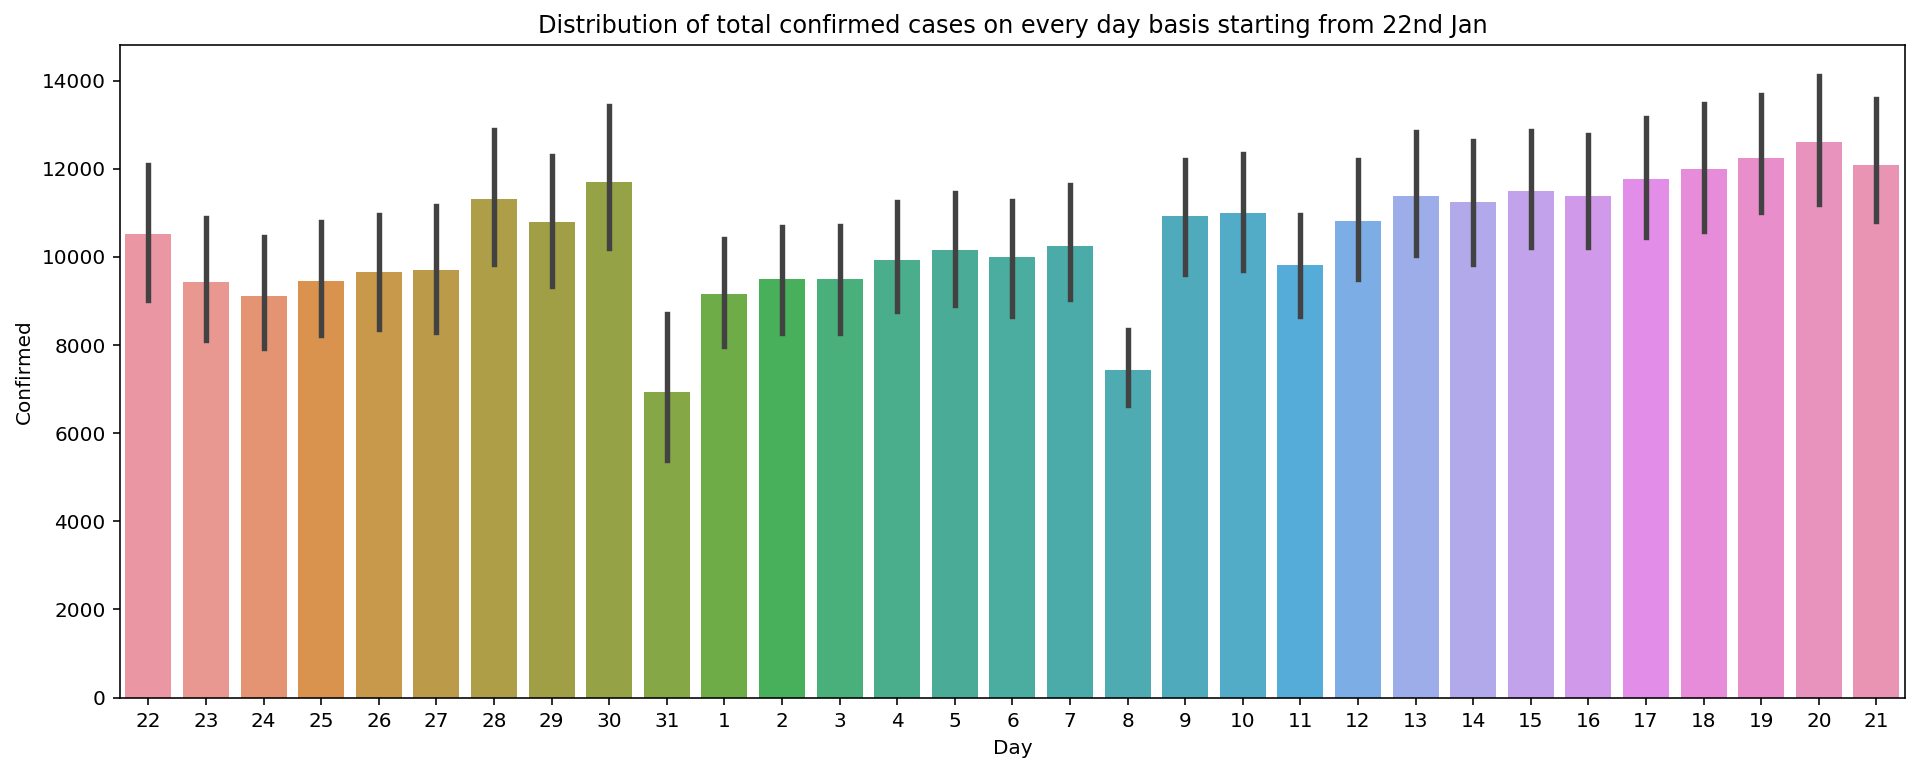

In [14]:
formatted_text('***Confirmed Cases VS Day***')
plt.figure(figsize = (16, 6))
sns.barplot(x = 'Day', y = 'Confirmed', data = nCoV_data, order = nCoV_data.Day.unique().tolist())
plt.title('Distribution of total confirmed cases on every day basis starting from 22nd Jan')

***Death Toll VS Day***

Text(0.5, 1.0, 'Distribution of total death toll on every day basis starting from 22nd Jan')

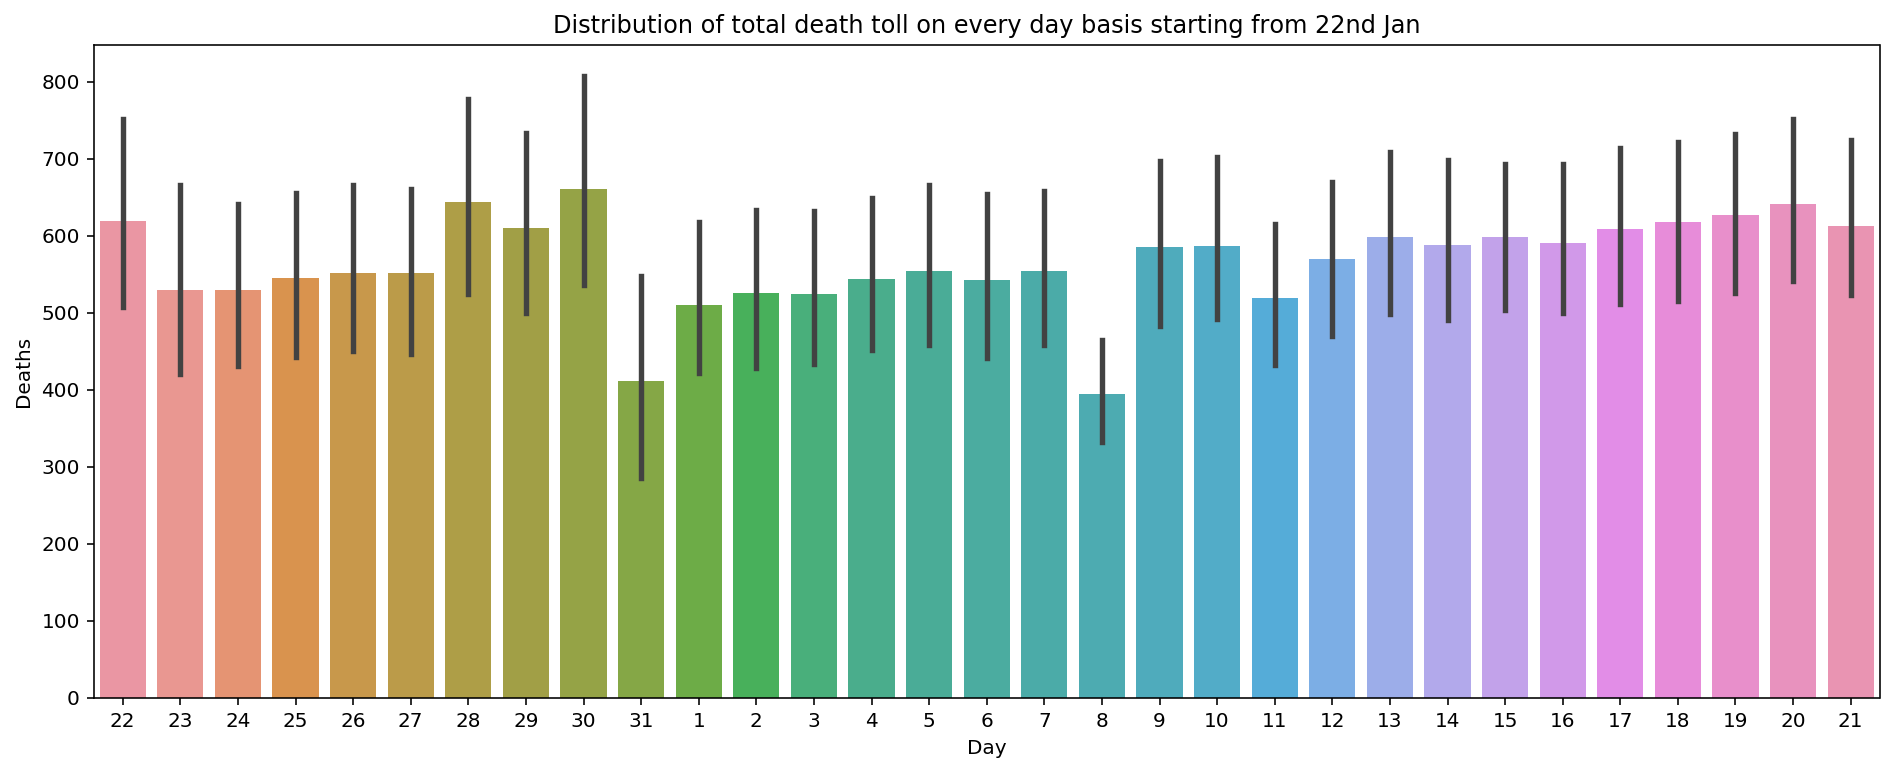

In [15]:
formatted_text('***Death Toll VS Day***')
plt.figure(figsize = (16, 6))
sns.barplot(x = 'Day', y = 'Deaths', data = nCoV_data,
           order = nCoV_data.Day.unique().tolist())
plt.title('Distribution of total death toll on every day basis starting from 22nd Jan')

***Recovered Cases VS Day***

Text(0.5, 1.0, 'Distribution of total recovered cases on every day basis starting from 22nd Jan')

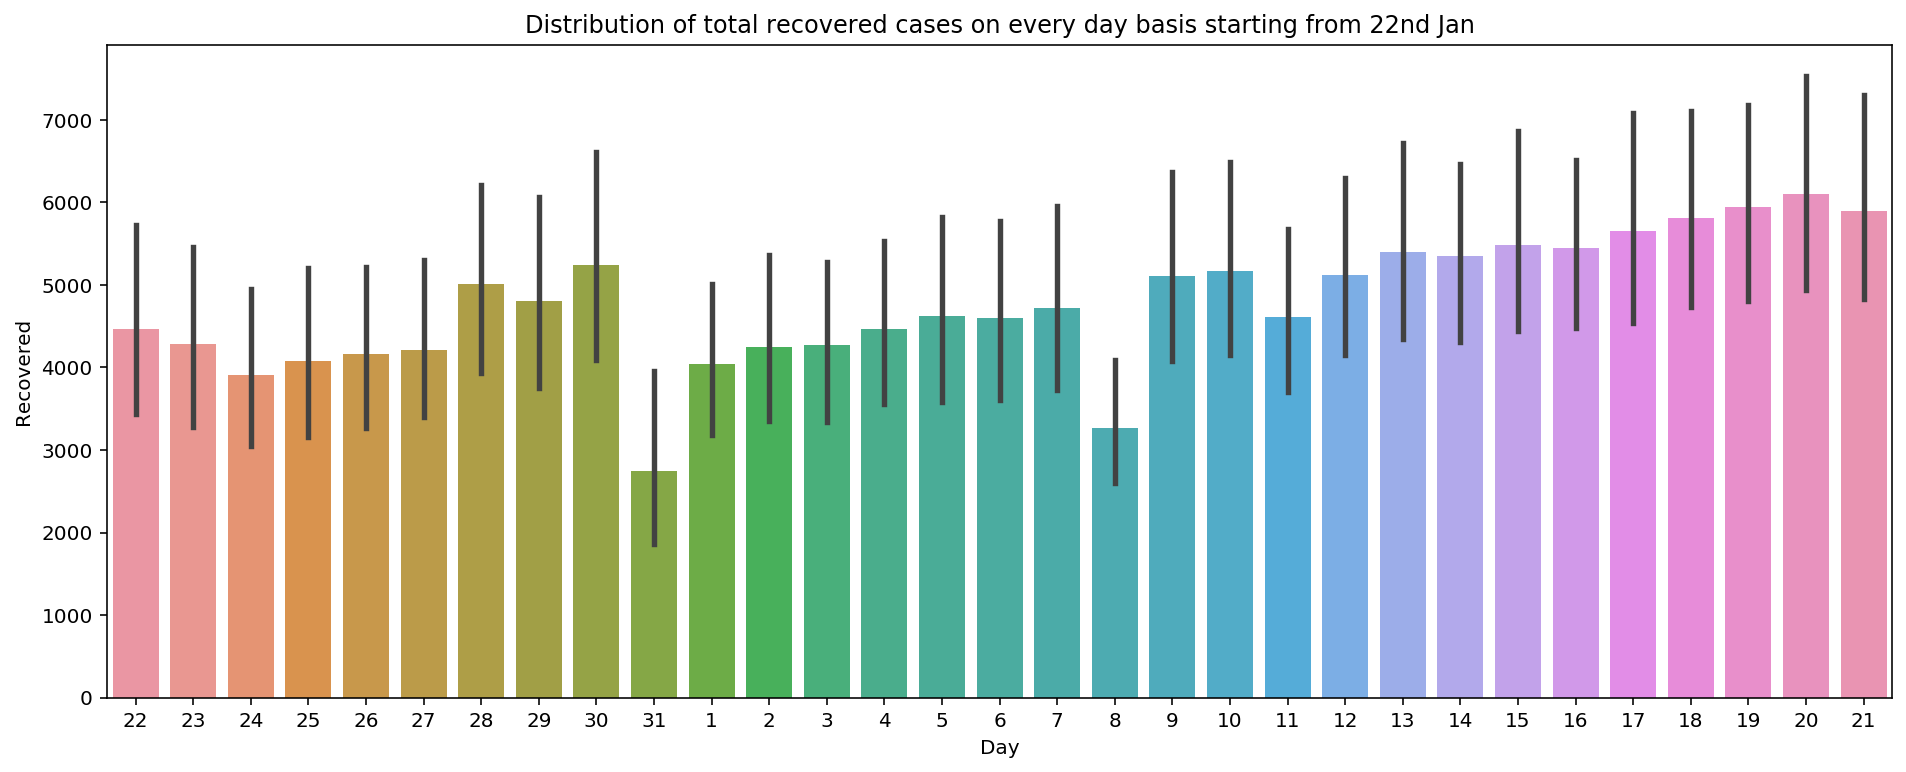

In [16]:
formatted_text('***Recovered Cases VS Day***')
plt.figure(figsize = (16, 6))
sns.barplot(x = 'Day', y = 'Recovered', data = nCoV_data,
           order = nCoV_data.Day.unique().tolist())
plt.title('Distribution of total recovered cases on every day basis starting from 22nd Jan')

=> As we see from the plots above, China (& Main Land China) are the worst affected regions with majority of the cases being detected right from the onset of the dealdy outbreak.

## Current Situation
Let's now take a look at the latest numbers. We will create a net dataset to store just the latest information.

In [18]:
# Make the latest data extraction generic. As the data is getting updated on a daily (hourly) basis,
# the below code would work without needing to be updated to extract the latest data.
# We will here extract the year, month and day from the last reported case and use it.

StrDate = nCoV_data['Date'][-1:].astype('str')
year = int(StrDate.values[0].split('-')[0])
month = int(StrDate.values[0].split('-')[1])
day = int(StrDate.values[0].split('-')[2].split()[0])

formatted_text('***Last reported case date-time***')
print(StrDate)
print(year)
print(month)
print(StrDate.values[0].split('-')[2].split())
print(pd.Timestamp(date(year, month, day)).date())

***Last reported case date-time***

68557    2020-07-20
Name: Date, dtype: object
2020
7
['20']
2020-07-20


In [26]:
latest_nCoV_data = nCoV_data[nCoV_data['Last Update'] > pd.Timestamp(date(year, month, day))]

# Data Glimpse
latest_nCoV_data.tail()

Date              State      Country         Last Update  \
68553 2020-07-20  Zaporizhia Oblast      Ukraine 2020-07-21 04:38:46   
68554 2020-07-20            Zeeland  Netherlands 2020-07-21 04:38:46   
68555 2020-07-20           Zhejiang        China 2020-07-21 04:38:46   
68556 2020-07-20    Zhytomyr Oblast      Ukraine 2020-07-21 04:38:46   
68557 2020-07-20       Zuid-Holland  Netherlands 2020-07-21 04:38:46   

       Confirmed  Deaths  Recovered   Active  Day  Hour  
68553      678.0    20.0      551.0    107.0   21     4  
68554      791.0    69.0        0.0    722.0   21     4  
68555     1270.0     1.0     1267.0      2.0   21     4  
68556     1602.0    34.0     1251.0    317.0   21     4  
68557    11886.0  1305.0        0.0  10581.0   21     4

In [29]:
# Getting the latest numbers

formatted_text('***Latest Numbers Globaly***')
print('Confirmed Cases around the globe : ', latest_nCoV_data['Confirmed'].sum())
print('Deaths Confirmed around the globe : ', latest_nCoV_data['Deaths'].sum())
print('Recovered Cases around the globe : ', latest_nCoV_data['Recovered'].sum())
print('Total Active Cases around the globe : ', latest_nCoV_data['Active'].sum())

***Latest Numbers Globaly***

Confirmed Cases around the globe :  29210784.0
Deaths Confirmed around the globe :  1216060.0
Recovered Cases around the globe :  16424094.0
Total Active Cases around the globe :  11570630.0


## Analysis of the confirmed Virus Spread Country Wise

In [30]:
formatted_text('***Countries Affected WorldWide as per the current date -***')
allCountries = latest_nCoV_data['Country'].unique().tolist()
print(allCountries)

print("\nTotal countries affected by virus: ", len(allCountries))

***Countries Affected WorldWide as per the current date -***

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Ivory Coast', 'Jamaica', 'Jordan', 'Kazakhstan', '

In [32]:
CountryWiseData = pd.DataFrame(latest_nCoV_data.groupby('Country')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum())
CountryWiseData['Country'] = CountryWiseData.index
CountryWiseData.index = np.arange(1, len(allCountries) + 1)

CountryWiseData = CountryWiseData[['Country', 'Confirmed', 'Deaths', 'Recovered', 'Active']]

formatted_text('***Country wise Analysis of ''Confirmed'', ''Deaths'', ''Recovered'', ''Active'' Cases***')
CountryWiseData

C:\Users\HJ\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



***Country wise Analysis of Confirmed, Deaths, Recovered, Active Cases***

Country  Confirmed  Deaths  Recovered   Active
1           Afghanistan    71001.0  2366.0    47375.0  21260.0
2               Albania     8261.0   225.0     4663.0   3373.0
3               Algeria    46775.0  2165.0    32451.0  12159.0
4               Andorra     1764.0   104.0     1606.0     54.0
5                Angola     1454.0    58.0      442.0    954.0
..                  ...        ...     ...        ...      ...
186  West Bank and Gaza    17465.0   125.0     3842.0  13498.0
187      Western Sahara       20.0     2.0       16.0      2.0
188               Yemen     3225.0   892.0     1426.0    907.0
189              Zambia     6306.0   248.0     3082.0   2976.0
190            Zimbabwe     3324.0    51.0      944.0   2329.0

[190 rows x 5 columns]

#### INFERENCES
1. CHINA has the most recorded cases as the outbreak happened there
2. The virus has spread to other countries as well. This could be due to people being present in China/Hubei as the time of the outbreak and in the event of their return to home country unknowingly carried the virus along.

## Day wise distribution (WorldWide) for Confirmed, Deaths and Recovered Cases

In [33]:
date_wise_data = nCoV_data[["Date", "Confirmed", "Deaths", "Recovered", "Active"]]
date_wise_data.head()

Date  Confirmed  Deaths  Recovered  Active
0 2020-01-22        1.0     0.0        0.0     1.0
1 2020-01-22       14.0     0.0        0.0    14.0
2 2020-01-22        6.0     0.0        0.0     6.0
3 2020-01-22        1.0     0.0        0.0     1.0
4 2020-01-22        0.0     0.0        0.0     0.0

In [34]:
date_wise_data = date_wise_data.groupby(["Date"]).sum().reset_index()

# Strip off the time part from date for day-wise distribution.
date_wise_data.Date = date_wise_data.Date.apply(lambda x:x.date())

formatted_text('***Day wise distribution (WorldWide) for confirmed, Deaths and Recovered Cases***')
date_wise_data

***Day wise distribution (WorldWide) for confirmed, Deaths and Recovered Cases***

Date   Confirmed    Deaths  Recovered     Active
0    2020-01-22       555.0      17.0       28.0      510.0
1    2020-01-23       653.0      18.0       30.0      605.0
2    2020-01-24       941.0      26.0       36.0      879.0
3    2020-01-25      1438.0      42.0       39.0     1357.0
4    2020-01-26      2118.0      56.0       52.0     2010.0
..          ...         ...       ...        ...        ...
176  2020-07-16  13805296.0  589911.0  7711525.0  5503860.0
177  2020-07-17  14055299.0  596518.0  7894890.0  5563891.0
178  2020-07-18  14292922.0  602144.0  8045827.0  5644951.0
179  2020-07-19  14507491.0  606173.0  8133663.0  5767655.0
180  2020-07-20  14703293.0  609887.0  8290431.0  5802975.0

[181 rows x 5 columns]

***Day wise distribution (WorldWide) for Confirmed, Deaths and Recovered Cases***

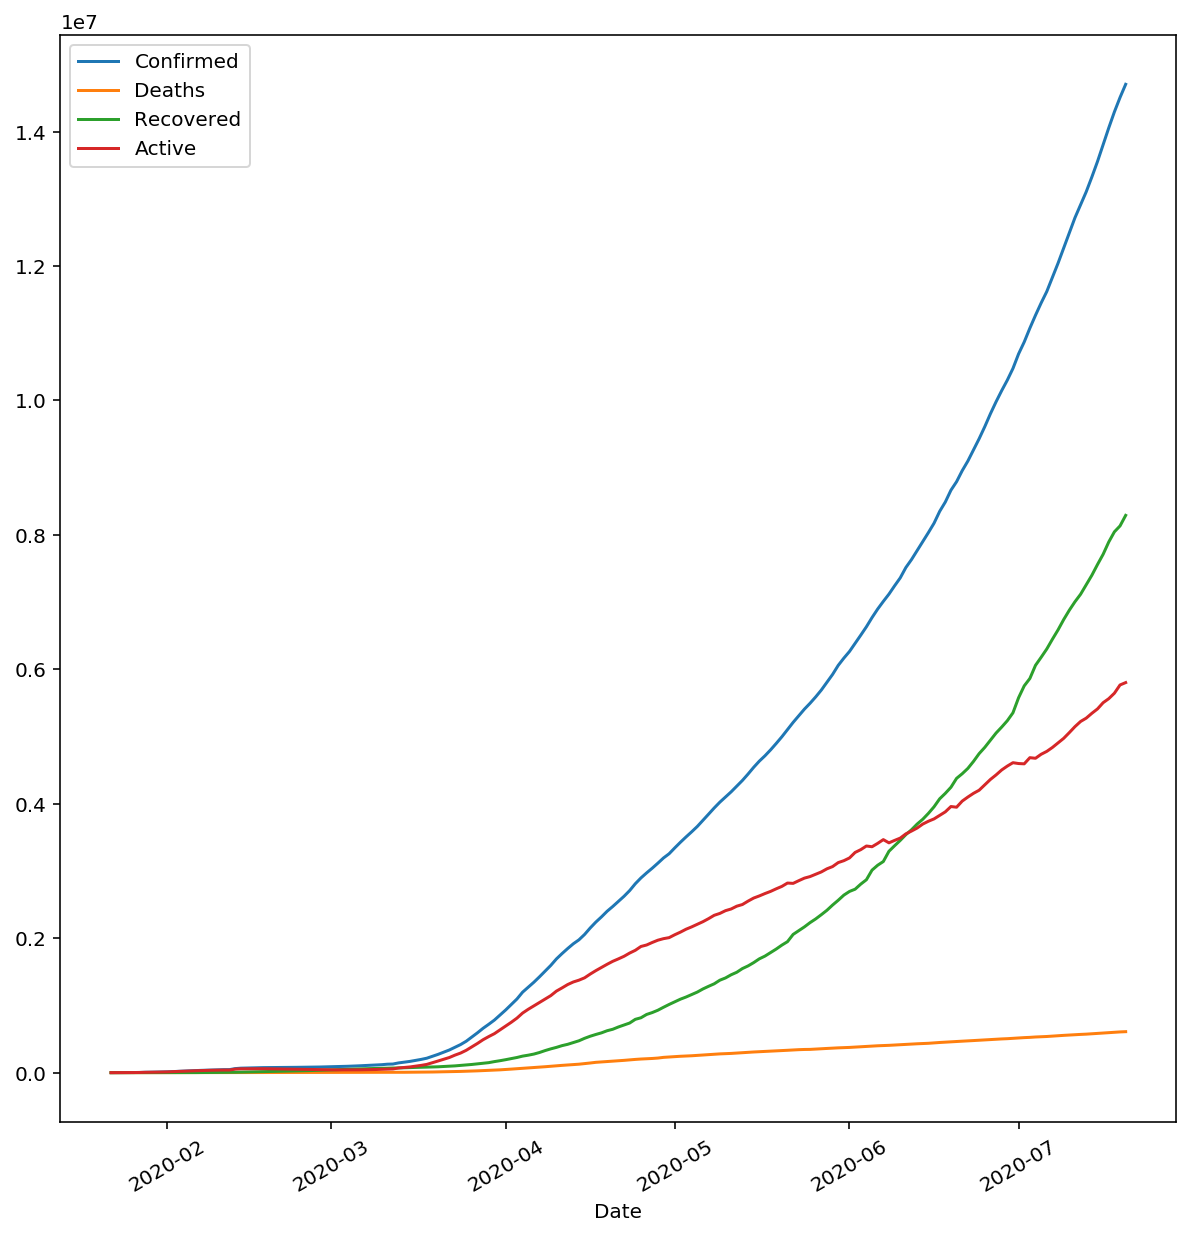

In [36]:
formatted_text('***Day wise distribution (WorldWide) for Confirmed, Deaths and Recovered Cases***')
date_wise_data.plot('Date', ['Confirmed', 'Deaths', 'Recovered', 'Active'], figsize = (10, 10), rot = 30)

## Global Spread Over Time

In [45]:
global_data_over_time = date_wise_data.groupby('Date')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()

scatterPlotCasesOverTime(global_data_over_time, "<b>Global</b>")

C:\Users\HJ\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [46]:
plotDailyReportedCasesOverTime(global_data_over_time, "all over the world")

#### INFERENCES
1. The number of confirmed cases is on the rise day by day. The rise is very steep.
2. The recovery does not look that great. The number of cases recovered is far more less the number of confirmed cases.
3. The number of death cases till tade has been 492.

## Distribution in China

In [47]:
china_latest_data = latest_nCoV_data[latest_nCoV_data['Country'] == 'China'][["State", "Confirmed", "Deaths", "Recovered", "Active"]]

# Reset Index
china_latest_data.reset_index(drop = True, inplace = True)
china_latest_data.index = pd.RangeIndex(start = 1, stop = len(china_latest_data['State']) + 1, step = 1)

formatted_text('***Numbers in China for Confirmed, Deaths, Recovered and Active Cases***')

# Data Glimpse
china_latest_data

***Numbers in China for Confirmed, Deaths, Recovered and Active Cases***

State  Confirmed  Deaths  Recovered  Active
1       Anhui      991.0     6.0      985.0     0.0
2     Beijing      929.0     9.0      752.0   168.0
3   Chongqing      583.0     6.0      576.0     1.0
4      Fujian      363.0     1.0      361.0     1.0
5       Gansu      167.0     2.0      165.0     0.0
..        ...        ...     ...        ...     ...
58    Tianjin      203.0     3.0      195.0     5.0
59      Tibet        1.0     0.0        1.0     0.0
60   Xinjiang       77.0     3.0       73.0     1.0
61     Yunnan      188.0     2.0      183.0     3.0
62   Zhejiang     1270.0     1.0     1267.0     2.0

[62 rows x 5 columns]

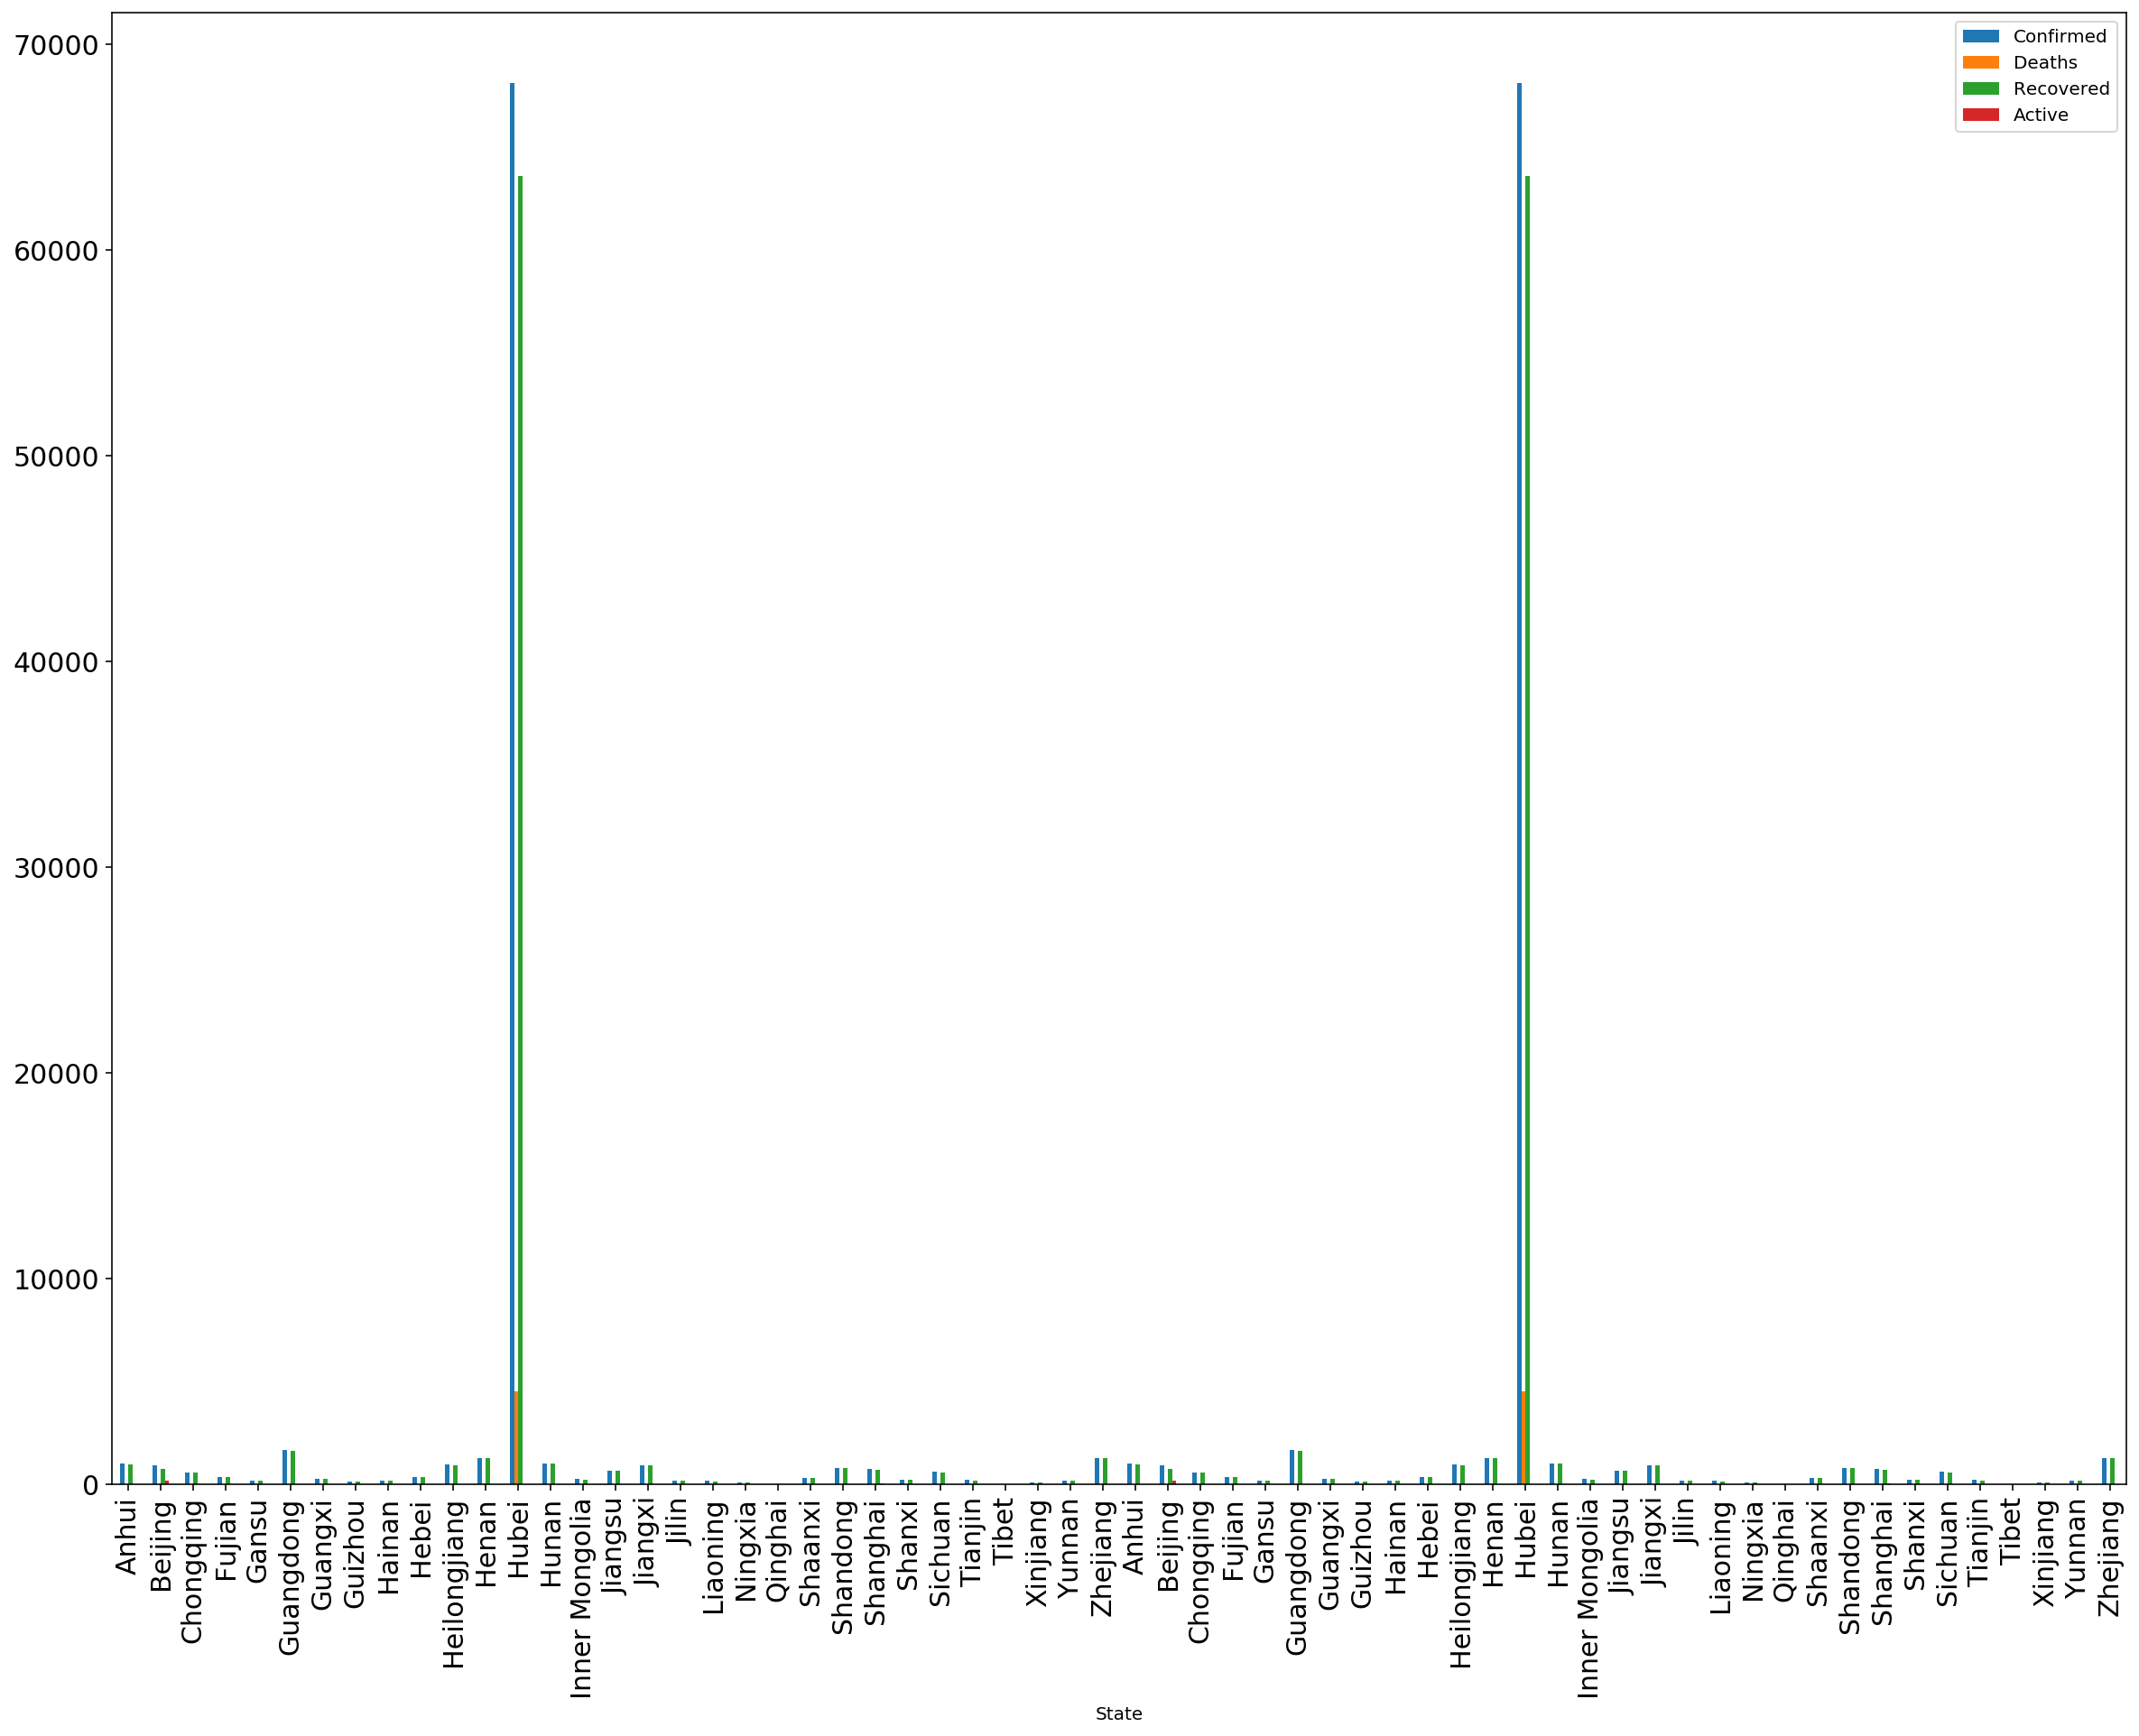

In [49]:
china_latest_data.plot('State', ['Confirmed', 'Deaths', 'Recovered', 'Active'],
                       kind = 'bar', 
                       figsize = (20, 15), 
                       fontsize = 15)

## nCov Distribution - Hubei

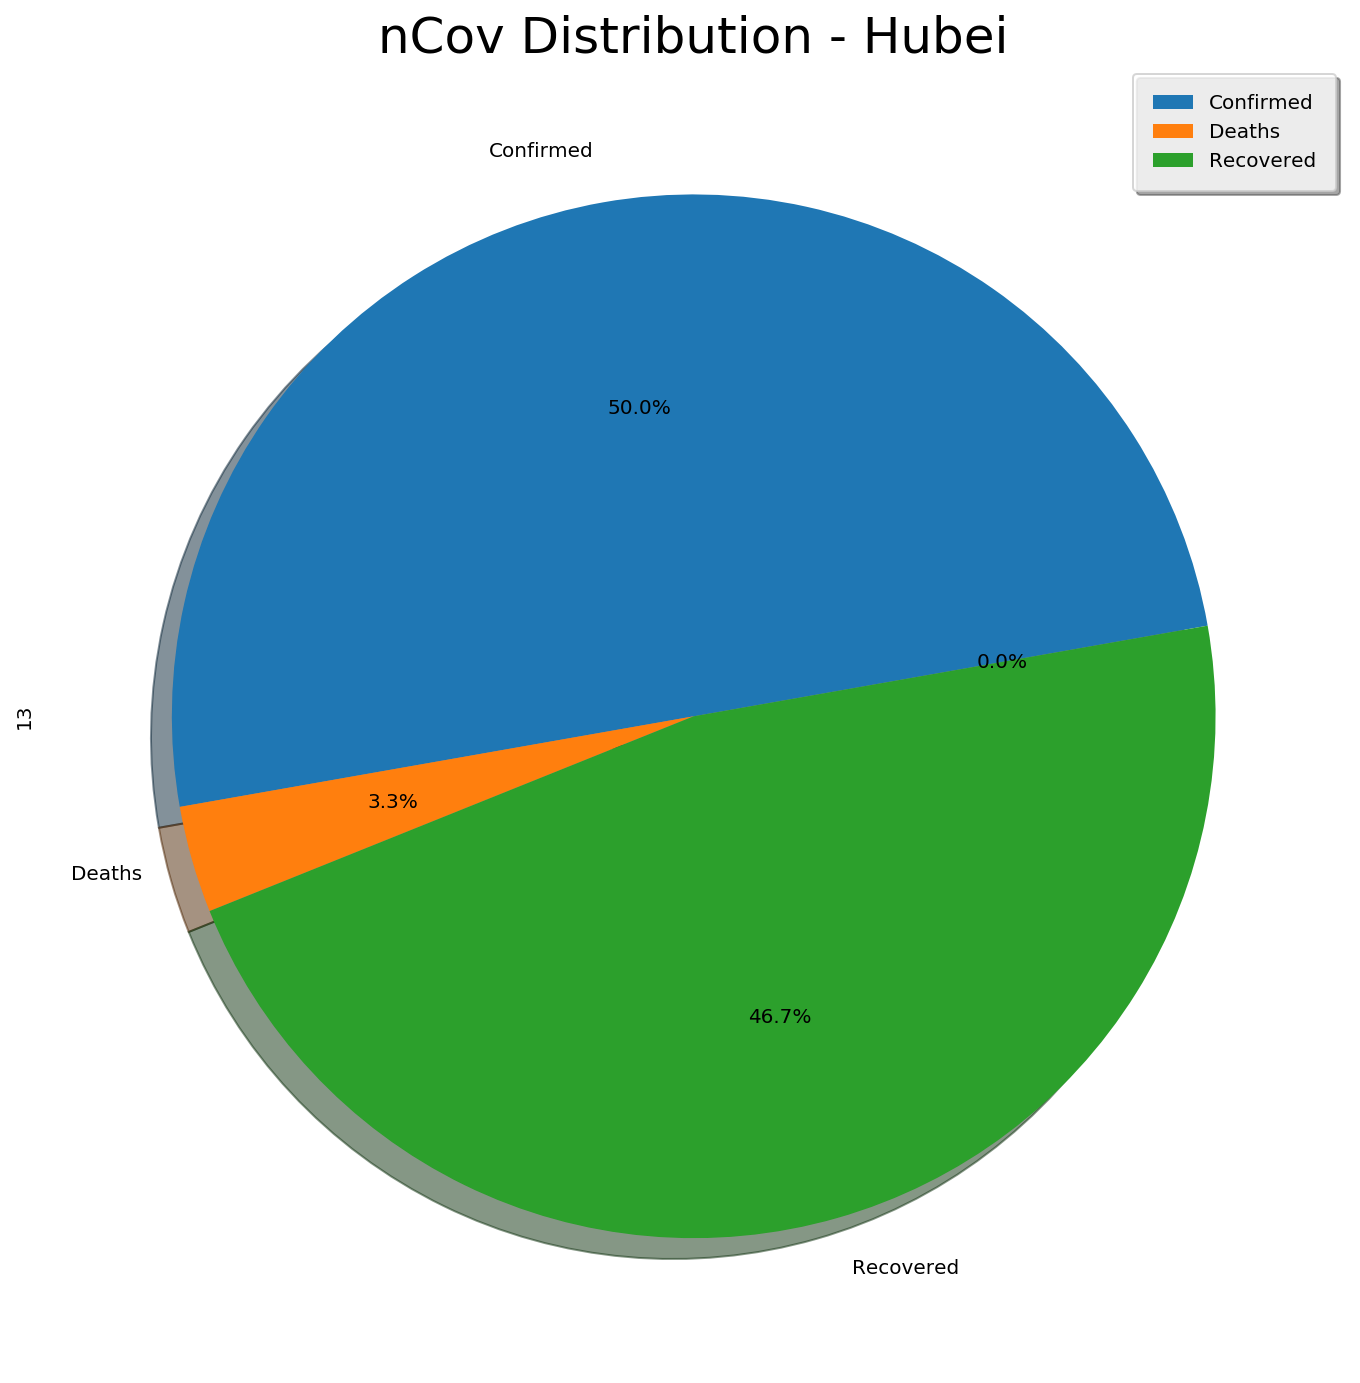

In [50]:
Hubei = china_latest_data[china_latest_data.State == 'Hubei']
Hubei = Hubei[['Confirmed', 'Deaths', 'Recovered', 'Active']]
# Remove the state column as it does not have any numeric data
Hubei = Hubei.iloc[0]
# Hubei

plt.figure(figsize = (12, 12))

Hubei.plot(kind = 'pie',
          autopct = '%1.1f%%',
          shadow = True,
          startangle = 10)

plt.title('nCov Distribution - Hubei', size = 25)
plt.legend(loc = "upper right",
          fontsize = 10,
          ncol = 1,
          fancybox = True,
          framealpha = 0.80,
          shadow = True,
          borderpad = 1);

## Hubei- Spread Over Time

In [55]:
plot = make_subplots(rows = 1, cols = 3, subplot_titles = ("Confirmed", "Deaths", "Recovered","Active"))

# to plot the spread over time. we would need the data distribution spread over time starting from 22nd Jan 2020
# So we will extract the sub-set from the original data.

hubei_data_over_time = nCoV_data[nCoV_data['State'] == 'Hubei']

scatterPlotCasesOverTime(hubei_data_over_time, "<b>Hubei</b>")

#### INFERENCES
1. Hubei is the worst affected by nCov with almost 95% of cases reported.
2. The recovery from the virus has not been that rapid. As the number of cases being reported is increasing at a very rapid rate and the virus being a new one proper medical treatment not availabe to treat the virus could the possible reason for the slowed down recovery. This can also be the reason for the number of deaths increasing day by day. The virus does not match any other known virus. This raised concern because when a virus is new, we do not know how it affects people.

## Rest Of China (Excluding Hubei)

In [59]:
rest_of_China = china_latest_data[china_latest_data['State'] != 'Hubei'][["State", "Confirmed",
                                                                         "Deaths", "Recovered", "Active"]]

# Reset Index to start from 1
rest_of_China.reset_index(drop = True, inplace = True)
rest_of_China.index = pd.RangeIndex(start = 1, stop = len(rest_of_China['State']) + 1, step = 1)

formatted_text('***Numbers in rest of China for Confirmed, Deaths, Recovered and Active Cases***')

# Data Glimpse
rest_of_China

***Numbers in rest of China for Confirmed, Deaths, Recovered and Active Cases***

State  Confirmed  Deaths  Recovered  Active
1            Anhui      991.0     6.0      985.0     0.0
2          Beijing      929.0     9.0      752.0   168.0
3        Chongqing      583.0     6.0      576.0     1.0
4           Fujian      363.0     1.0      361.0     1.0
5            Gansu      167.0     2.0      165.0     0.0
6        Guangdong     1650.0     8.0     1636.0     6.0
7          Guangxi      254.0     2.0      252.0     0.0
8          Guizhou      147.0     2.0      145.0     0.0
9           Hainan      171.0     6.0      165.0     0.0
10           Hebei      349.0     6.0      340.0     3.0
11    Heilongjiang      947.0    13.0      934.0     0.0
12           Henan     1276.0    22.0     1254.0     0.0
13           Hunan     1019.0     4.0     1015.0     0.0
14  Inner Mongolia      249.0     1.0      237.0    11.0
15         Jiangsu      654.0     0.0      654.0     0.0
16         Jiangxi      932.0     1.0      931.0     0.0
17           Jilin      155.0     2.0      153.0     0.0
18        Liaoning      164.0     2.0      150.0    12.0
19         Ningxia       75.0     0.0       75.0     0.0
20         Qinghai       18.0     0.0       18.0     0.0
21         Shaanxi      321.0     3.0      315.0     3.0
22        Shandong      793.0     7.0      785.0     1.0
23        Shanghai      732.0     7.0      691.0    34.0
24          Shanxi      201.0     0.0      198.0     3.0
25         Sichuan      599.0     3.0      590.0     6.0
26         Tianjin      203.0     3.0      195.0     5.0
27           Tibet        1.0     0.0        1.0     0.0
28        Xinjiang       77.0     3.0       73.0     1.0
29          Yunnan      188.0     2.0      183.0     3.0
30        Zhejiang     1270.0     1.0     1267.0     2.0
31           Anhui      991.0     6.0      985.0     0.0
32         Beijing      929.0     9.0      752.0   168.0
33       Chongqing      583.0     6.0      576.0     1.0
34          Fujian      363.0     1.0      361.0     1.0
35           Gansu      167.0     2.0      165.0     0.0
36       Guangdong     1650.0     8.0     1636.0     6.0
37         Guangxi      254.0     2.0      252.0     0.0
38         Guizhou      147.0     2.0      145.0     0.0
39          Hainan      171.0     6.0      165.0     0.0
40           Hebei      349.0     6.0      340.0     3.0
41    Heilongjiang      947.0    13.0      934.0     0.0
42           Henan     1276.0    22.0     1254.0     0.0
43           Hunan     1019.0     4.0     1015.0     0.0
44  Inner Mongolia      249.0     1.0      237.0    11.0
45         Jiangsu      654.0     0.0      654.0     0.0
46         Jiangxi      932.0     1.0      931.0     0.0
47           Jilin      155.0     2.0      153.0     0.0
48        Liaoning      164.0     2.0      150.0    12.0
49         Ningxia       75.0     0.0       75.0     0.0
50         Qinghai       18.0     0.0       18.0     0.0
51         Shaanxi      321.0     3.0      315.0     3.0
52        Shandong      793.0     7.0      785.0     1.0
53        Shanghai      732.0     7.0      691.0    34.0
54          Shanxi      201.0     0.0      198.0     3.0
55         Sichuan      599.0     3.0      590.0     6.0
56         Tianjin      203.0     3.0      195.0     5.0
57           Tibet        1.0     0.0        1.0     0.0
58        Xinjiang       77.0     3.0       73.0     1.0
59          Yunnan      188.0     2.0      183.0     3.0
60        Zhejiang     1270.0     1.0     1267.0     2.0

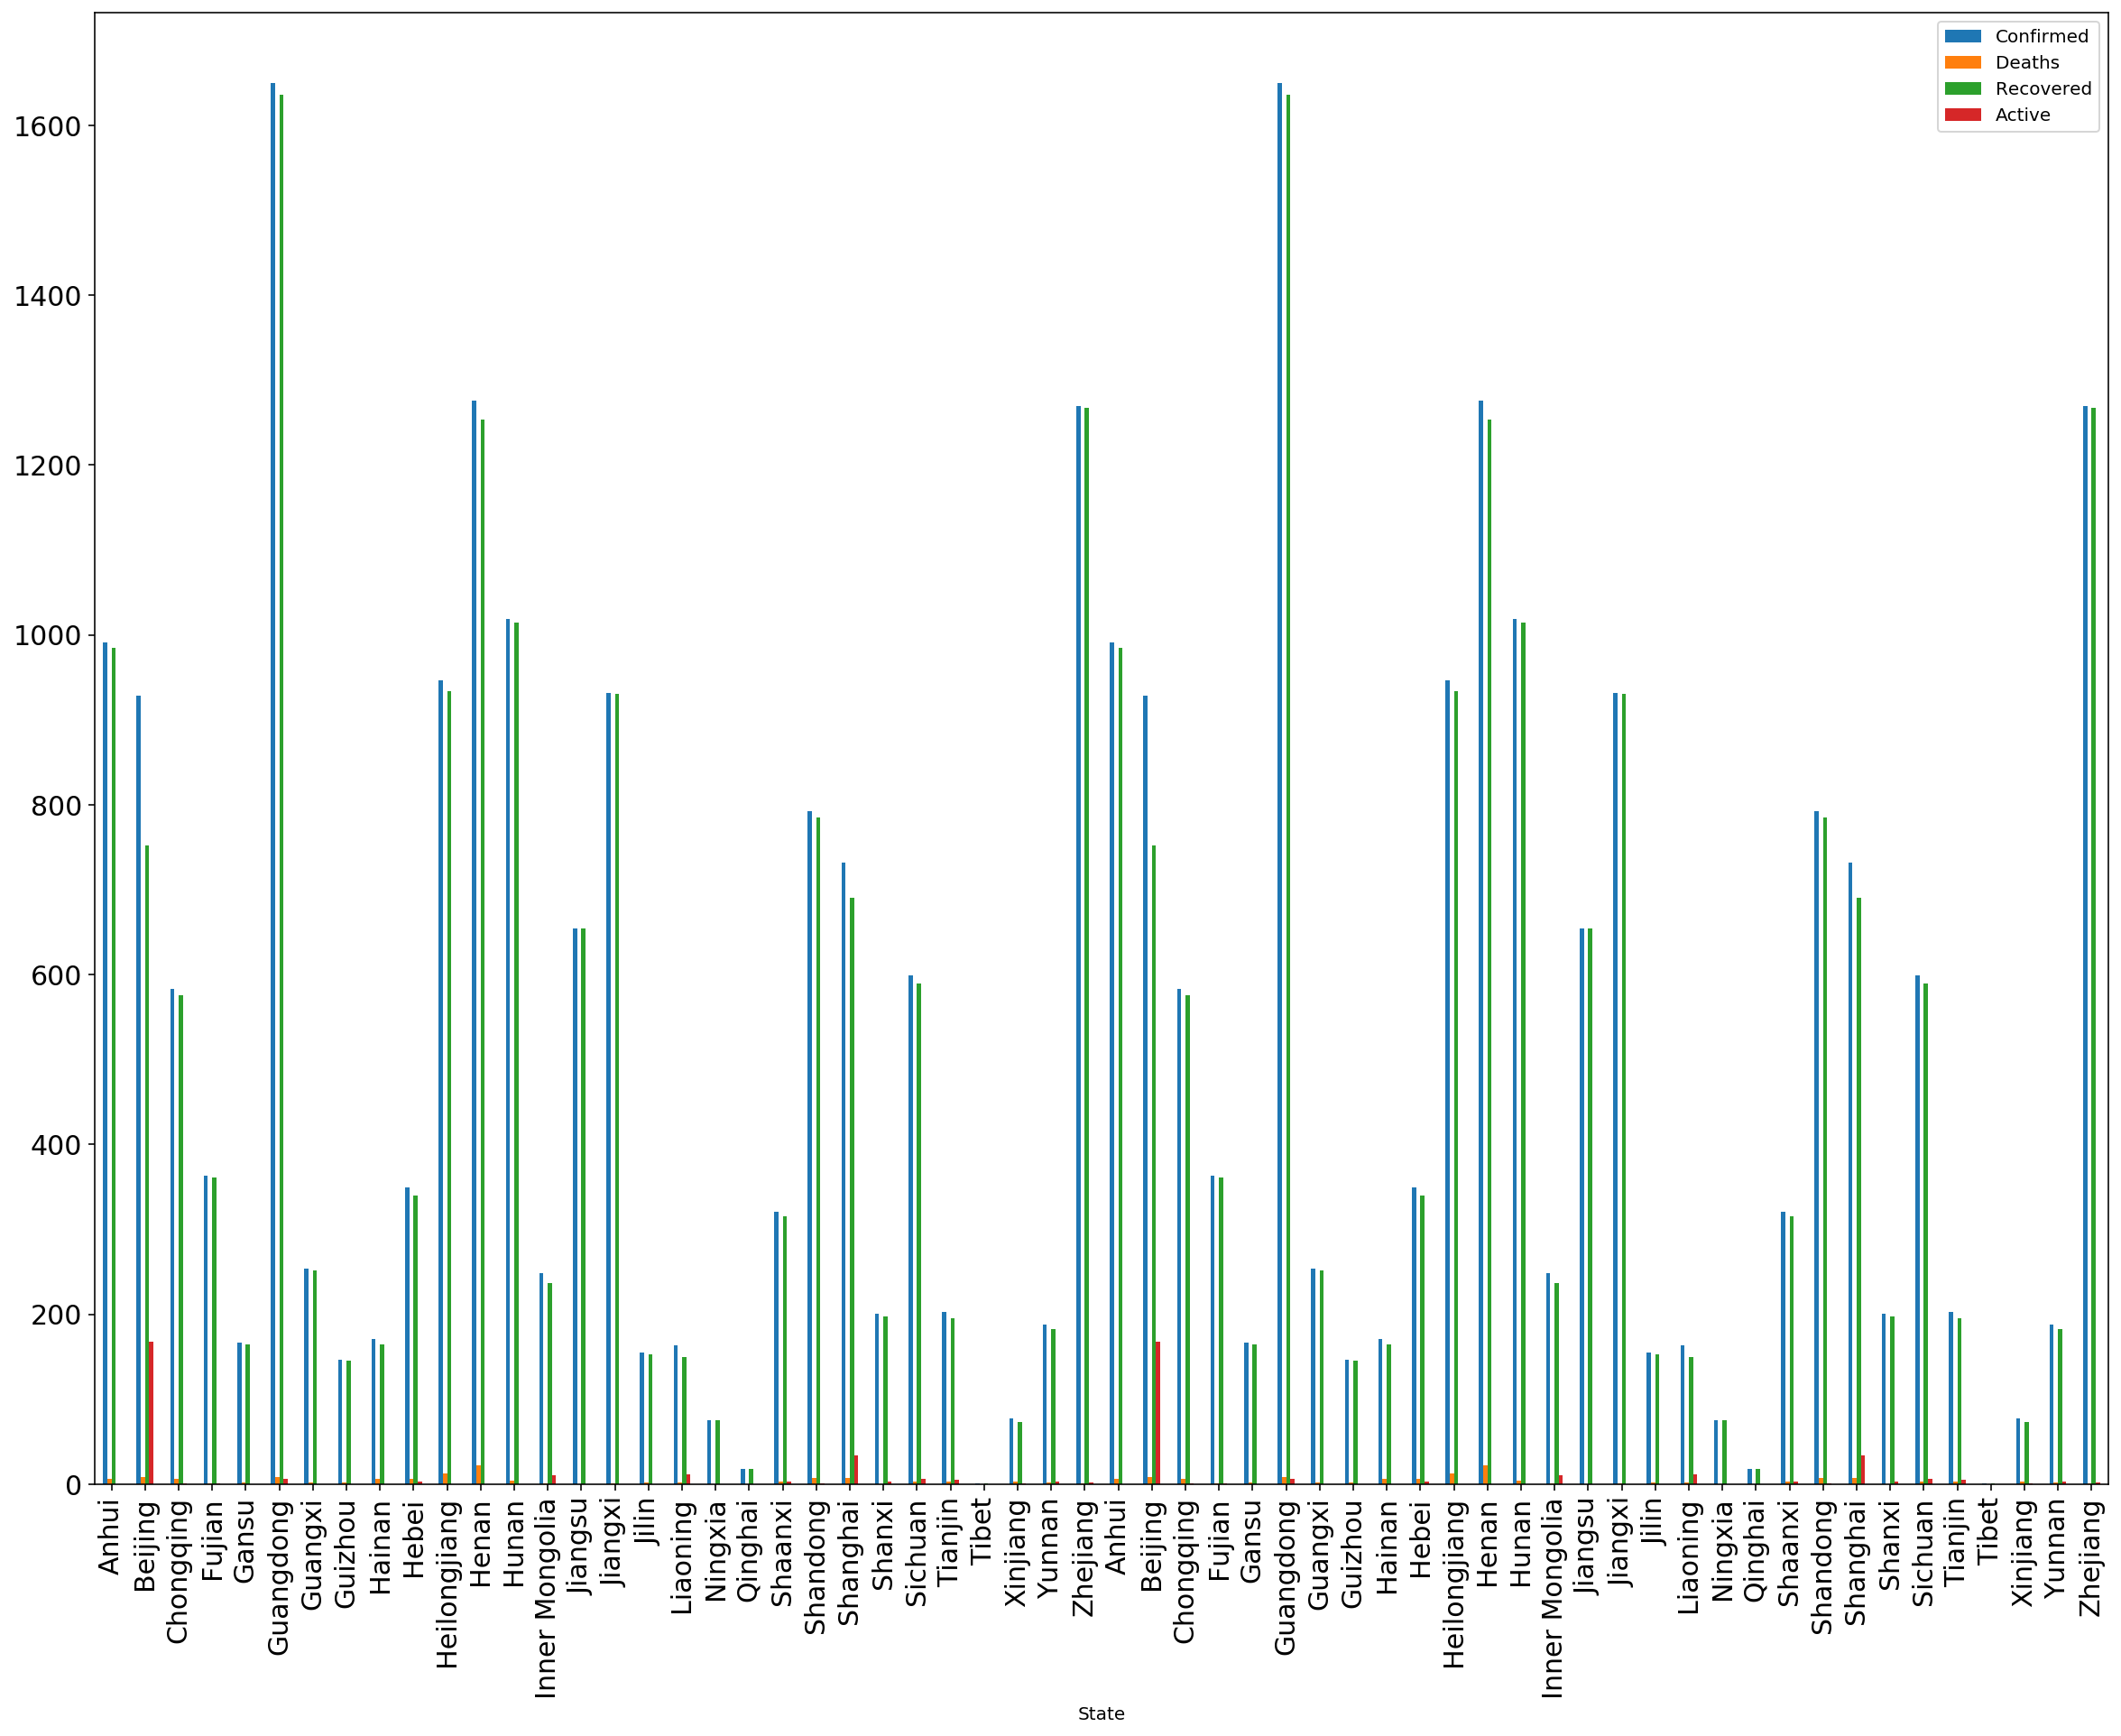

In [60]:
rest_of_China.plot('State', ['Confirmed', 'Deaths', 'Recovered', 'Active'], 
                   kind = 'bar', 
                   figsize = (20, 15),
                  fontsize = 15)

In [61]:
formatted_text('***Most number of Confirmed Cases Outside of Hubei***')
print(rest_of_China[rest_of_China['Confirmed'] > 500])

***Most number of Confirmed Cases Outside of Hubei***

           State  Confirmed  Deaths  Recovered  Active
1          Anhui      991.0     6.0      985.0     0.0
2        Beijing      929.0     9.0      752.0   168.0
3      Chongqing      583.0     6.0      576.0     1.0
6      Guangdong     1650.0     8.0     1636.0     6.0
11  Heilongjiang      947.0    13.0      934.0     0.0
12         Henan     1276.0    22.0     1254.0     0.0
13         Hunan     1019.0     4.0     1015.0     0.0
15       Jiangsu      654.0     0.0      654.0     0.0
16       Jiangxi      932.0     1.0      931.0     0.0
22      Shandong      793.0     7.0      785.0     1.0
23      Shanghai      732.0     7.0      691.0    34.0
25       Sichuan      599.0     3.0      590.0     6.0
30      Zhejiang     1270.0     1.0     1267.0     2.0
31         Anhui      991.0     6.0      985.0     0.0
32       Beijing      929.0     9.0      752.0   168.0
33     Chongqing      583.0     6.0      576.0     1.0
36     Guangdong     1650.0     8.0     1636.0     6.0
41  Heilon

## Rest of China(Excluding Hubei) - Spread Over Time

In [62]:
Plot = make_subplots(rows = 1, cols = 3, subplot_titles = ("Confirmed", "Deaths", "Recovered", "Active"))

# to plot the spread over time, we would need the data distribution spread over time starting from 22nd Jan 202
# So we will extract the sub-set from the original data.

chinese_data_over_time = nCoV_data[(nCoV_data['Country'] == 'China') & (nCoV_data['State'] != 'Hubei')]
chinese_data_over_time = chinese_data_over_time.groupby('Date')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()

scatterPlotCasesOverTime(chinese_data_over_time, "<b>Rest of China</b>")

C:\Users\HJ\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [63]:
plotDailyReportedCasesOverTime(chinese_data_over_time, "Rest of China")

#### INFERENCES
1. There have been many confirmed cases reported outside of Hubei. Zhejjang, Guangdong, Henan, Hunan being the top four.
2. The recovery from the virus outside of Hubei has not been fast. The virus did not match any other known virus. This raised concern becuase when a virus is new, we do not know how it affects people. However the number of deaths have very minimal.

## Top 10 Countires

In [64]:
top10 = CountryWiseData.sort_values('Confirmed', ascending = False)[:10]
top10

Country  Confirmed    Deaths  Recovered     Active
178            US  7603270.0  281440.0  2291208.0  5030622.0
24         Brazil  4217035.0  159608.0  2973372.0  1084055.0
80          India  2273544.0   55579.0  1424665.0   793300.0
142        Russia  1546523.0   24731.0  1102031.0   419761.0
158  South Africa   737956.0   10206.0   385924.0   341826.0
136          Peru   707180.0   26374.0   487036.0   193770.0
115        Mexico   693620.0   78669.0   518032.0    96919.0
36          Chile   661860.0   17006.0   603588.0    41266.0
177            UK   593302.0   90782.0     2826.0   499694.0
82           Iran   549990.0   28593.0   477875.0    43522.0

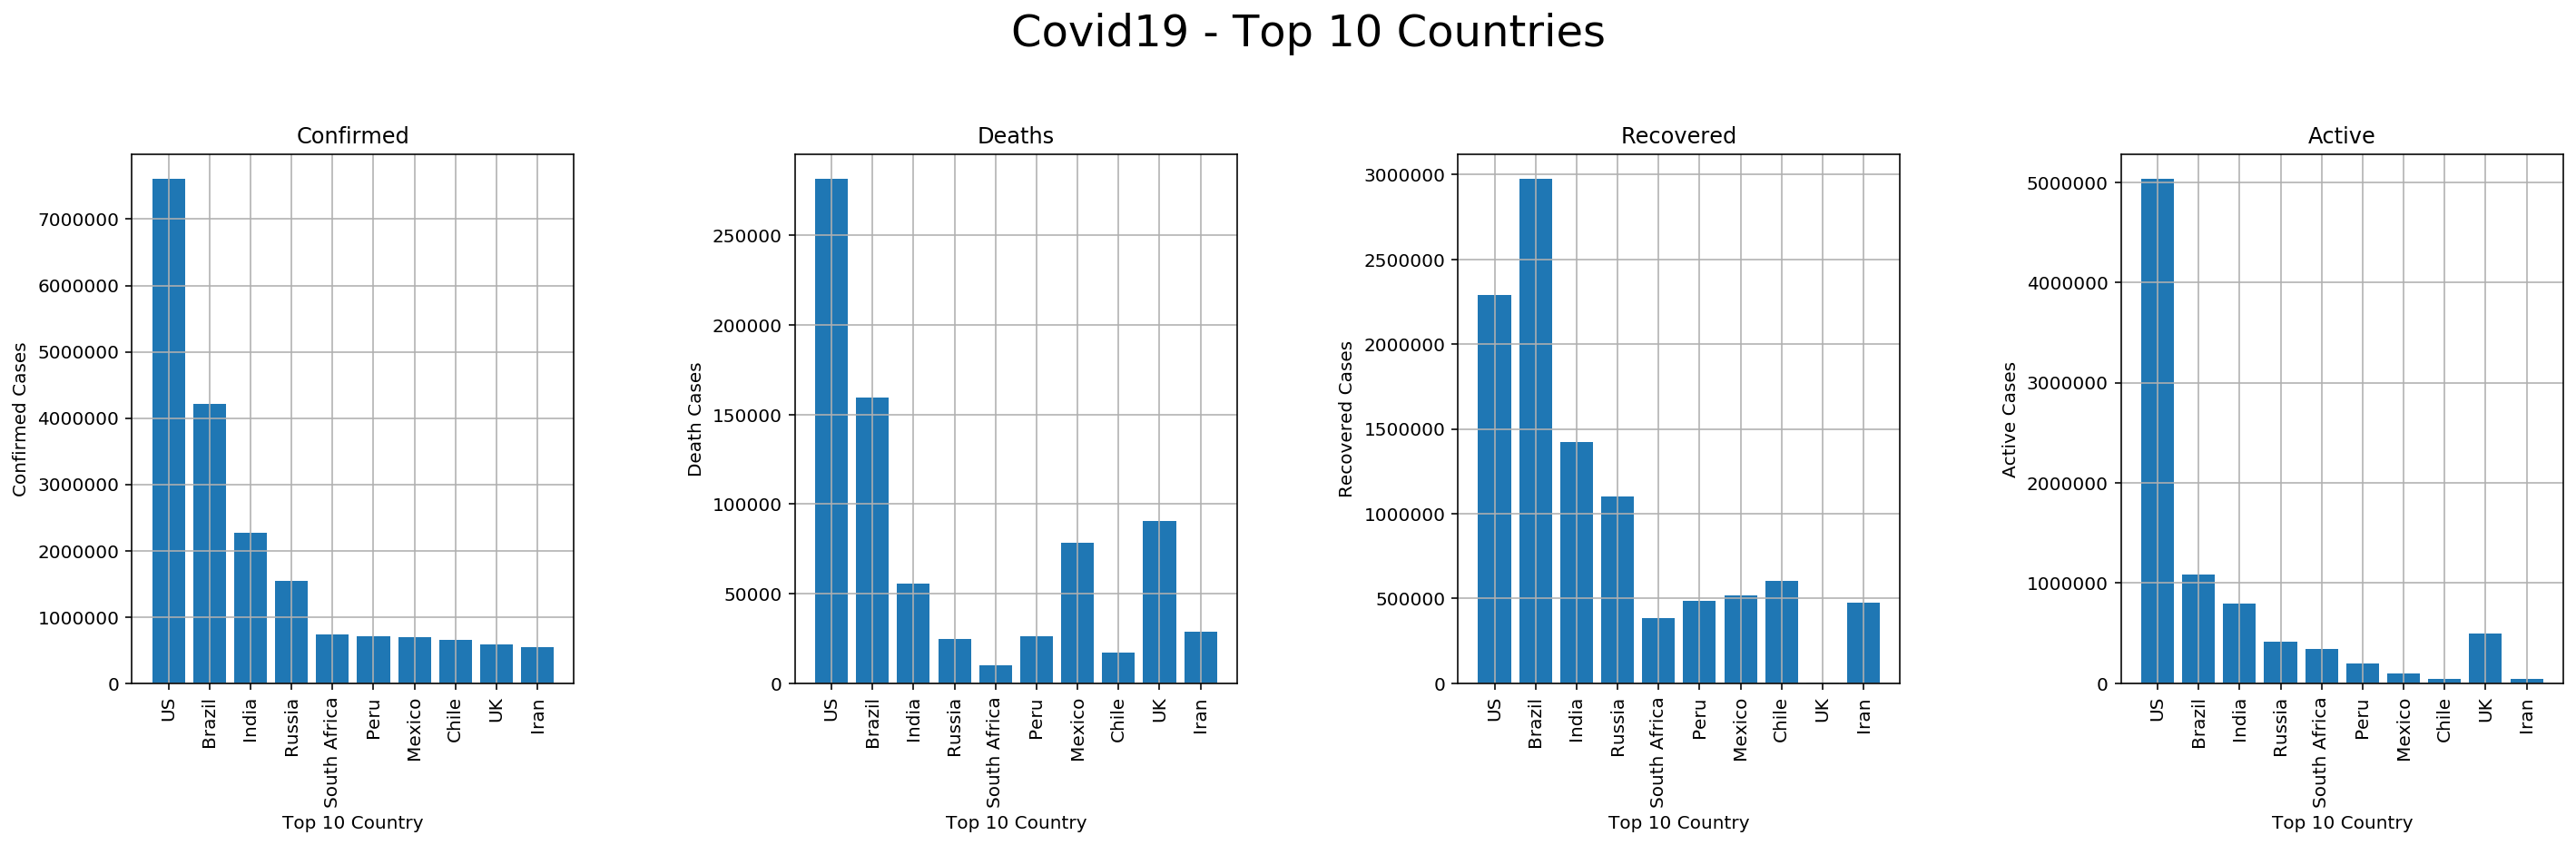

In [67]:
fig, axs = plt.subplots(1, 4, figsize = (24, 6))

ax_x = top10['Country']

ax_y0 = top10['Confirmed']
ax_y1 = top10['Deaths']
ax_y2 = top10['Recovered']
ax_y3 = top10['Active']

axs[0].bar(ax_x, ax_y0)
axs[0].set_xlabel('Top 10 Country')
axs[0].set_ylabel('Confirmed Cases')
axs[0].title.set_text('Confirmed')

axs[1].bar(ax_x, ax_y1)
axs[1].set_xlabel('Top 10 Country')
axs[1].set_ylabel('Death Cases')
axs[1].title.set_text('Deaths')

axs[2].bar(ax_x, ax_y2)
axs[2].set_xlabel('Top 10 Country')
axs[2].set_ylabel('Recovered Cases')
axs[2].title.set_text('Recovered')

axs[3].bar(ax_x, ax_y3)
axs[3].set_xlabel('Top 10 Country')
axs[3].set_ylabel('Active Cases')
axs[3].title.set_text('Active')

for ax in axs:
    ax.tick_params('x', labelrotation = 90)
    ax.grid(axis = 'both')
    
plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.5)
plt.subplots_adjust(top = 0.8)

fig.suptitle("Covid19 - Top 10 Countries", fontsize = 24)
plt.show()

## Rest of World

In [70]:
rest_of_world = CountryWiseData[CountryWiseData['Country'] != 'China']
[["Country", "Confirmed", "Deaths", "Recoverd", "Active"]]

# Reset Index
rest_of_world.reset_index(drop = True, inplace = True)
rest_of_world.index = pd.RangeIndex(start = 1, stop = len(CountryWiseData['Country']), step = 1)

formatted_text('***Numbers in rest of world for Confirmed, Deaths and Recovered Cases***')

# Data Glimpse
rest_of_world

***Numbers in rest of world for Confirmed, Deaths and Recovered Cases***

Country  Confirmed  Deaths  Recovered   Active
1           Afghanistan    71001.0  2366.0    47375.0  21260.0
2               Albania     8261.0   225.0     4663.0   3373.0
3               Algeria    46775.0  2165.0    32451.0  12159.0
4               Andorra     1764.0   104.0     1606.0     54.0
5                Angola     1454.0    58.0      442.0    954.0
..                  ...        ...     ...        ...      ...
185  West Bank and Gaza    17465.0   125.0     3842.0  13498.0
186      Western Sahara       20.0     2.0       16.0      2.0
187               Yemen     3225.0   892.0     1426.0    907.0
188              Zambia     6306.0   248.0     3082.0   2976.0
189            Zimbabwe     3324.0    51.0      944.0   2329.0

[189 rows x 5 columns]

In [71]:
formatted_text('***Most number of Confirmed Cases Outside of China***')
print(rest_of_world[rest_of_world['Confirmed'] > 20])

***Most number of Confirmed Cases Outside of China***

                Country  Confirmed  Deaths  Recovered   Active
1           Afghanistan    71001.0  2366.0    47375.0  21260.0
2               Albania     8261.0   225.0     4663.0   3373.0
3               Algeria    46775.0  2165.0    32451.0  12159.0
4               Andorra     1764.0   104.0     1606.0     54.0
5                Angola     1454.0    58.0      442.0    954.0
..                  ...        ...     ...        ...      ...
184             Vietnam      767.0     0.0      717.0     50.0
185  West Bank and Gaza    17465.0   125.0     3842.0  13498.0
187               Yemen     3225.0   892.0     1426.0    907.0
188              Zambia     6306.0   248.0     3082.0   2976.0
189            Zimbabwe     3324.0    51.0      944.0   2329.0

[187 rows x 5 columns]


([<matplotlib.axis.XTick at 0x1e36ff85388>,
 <a list of 189 Text xticklabel objects>)

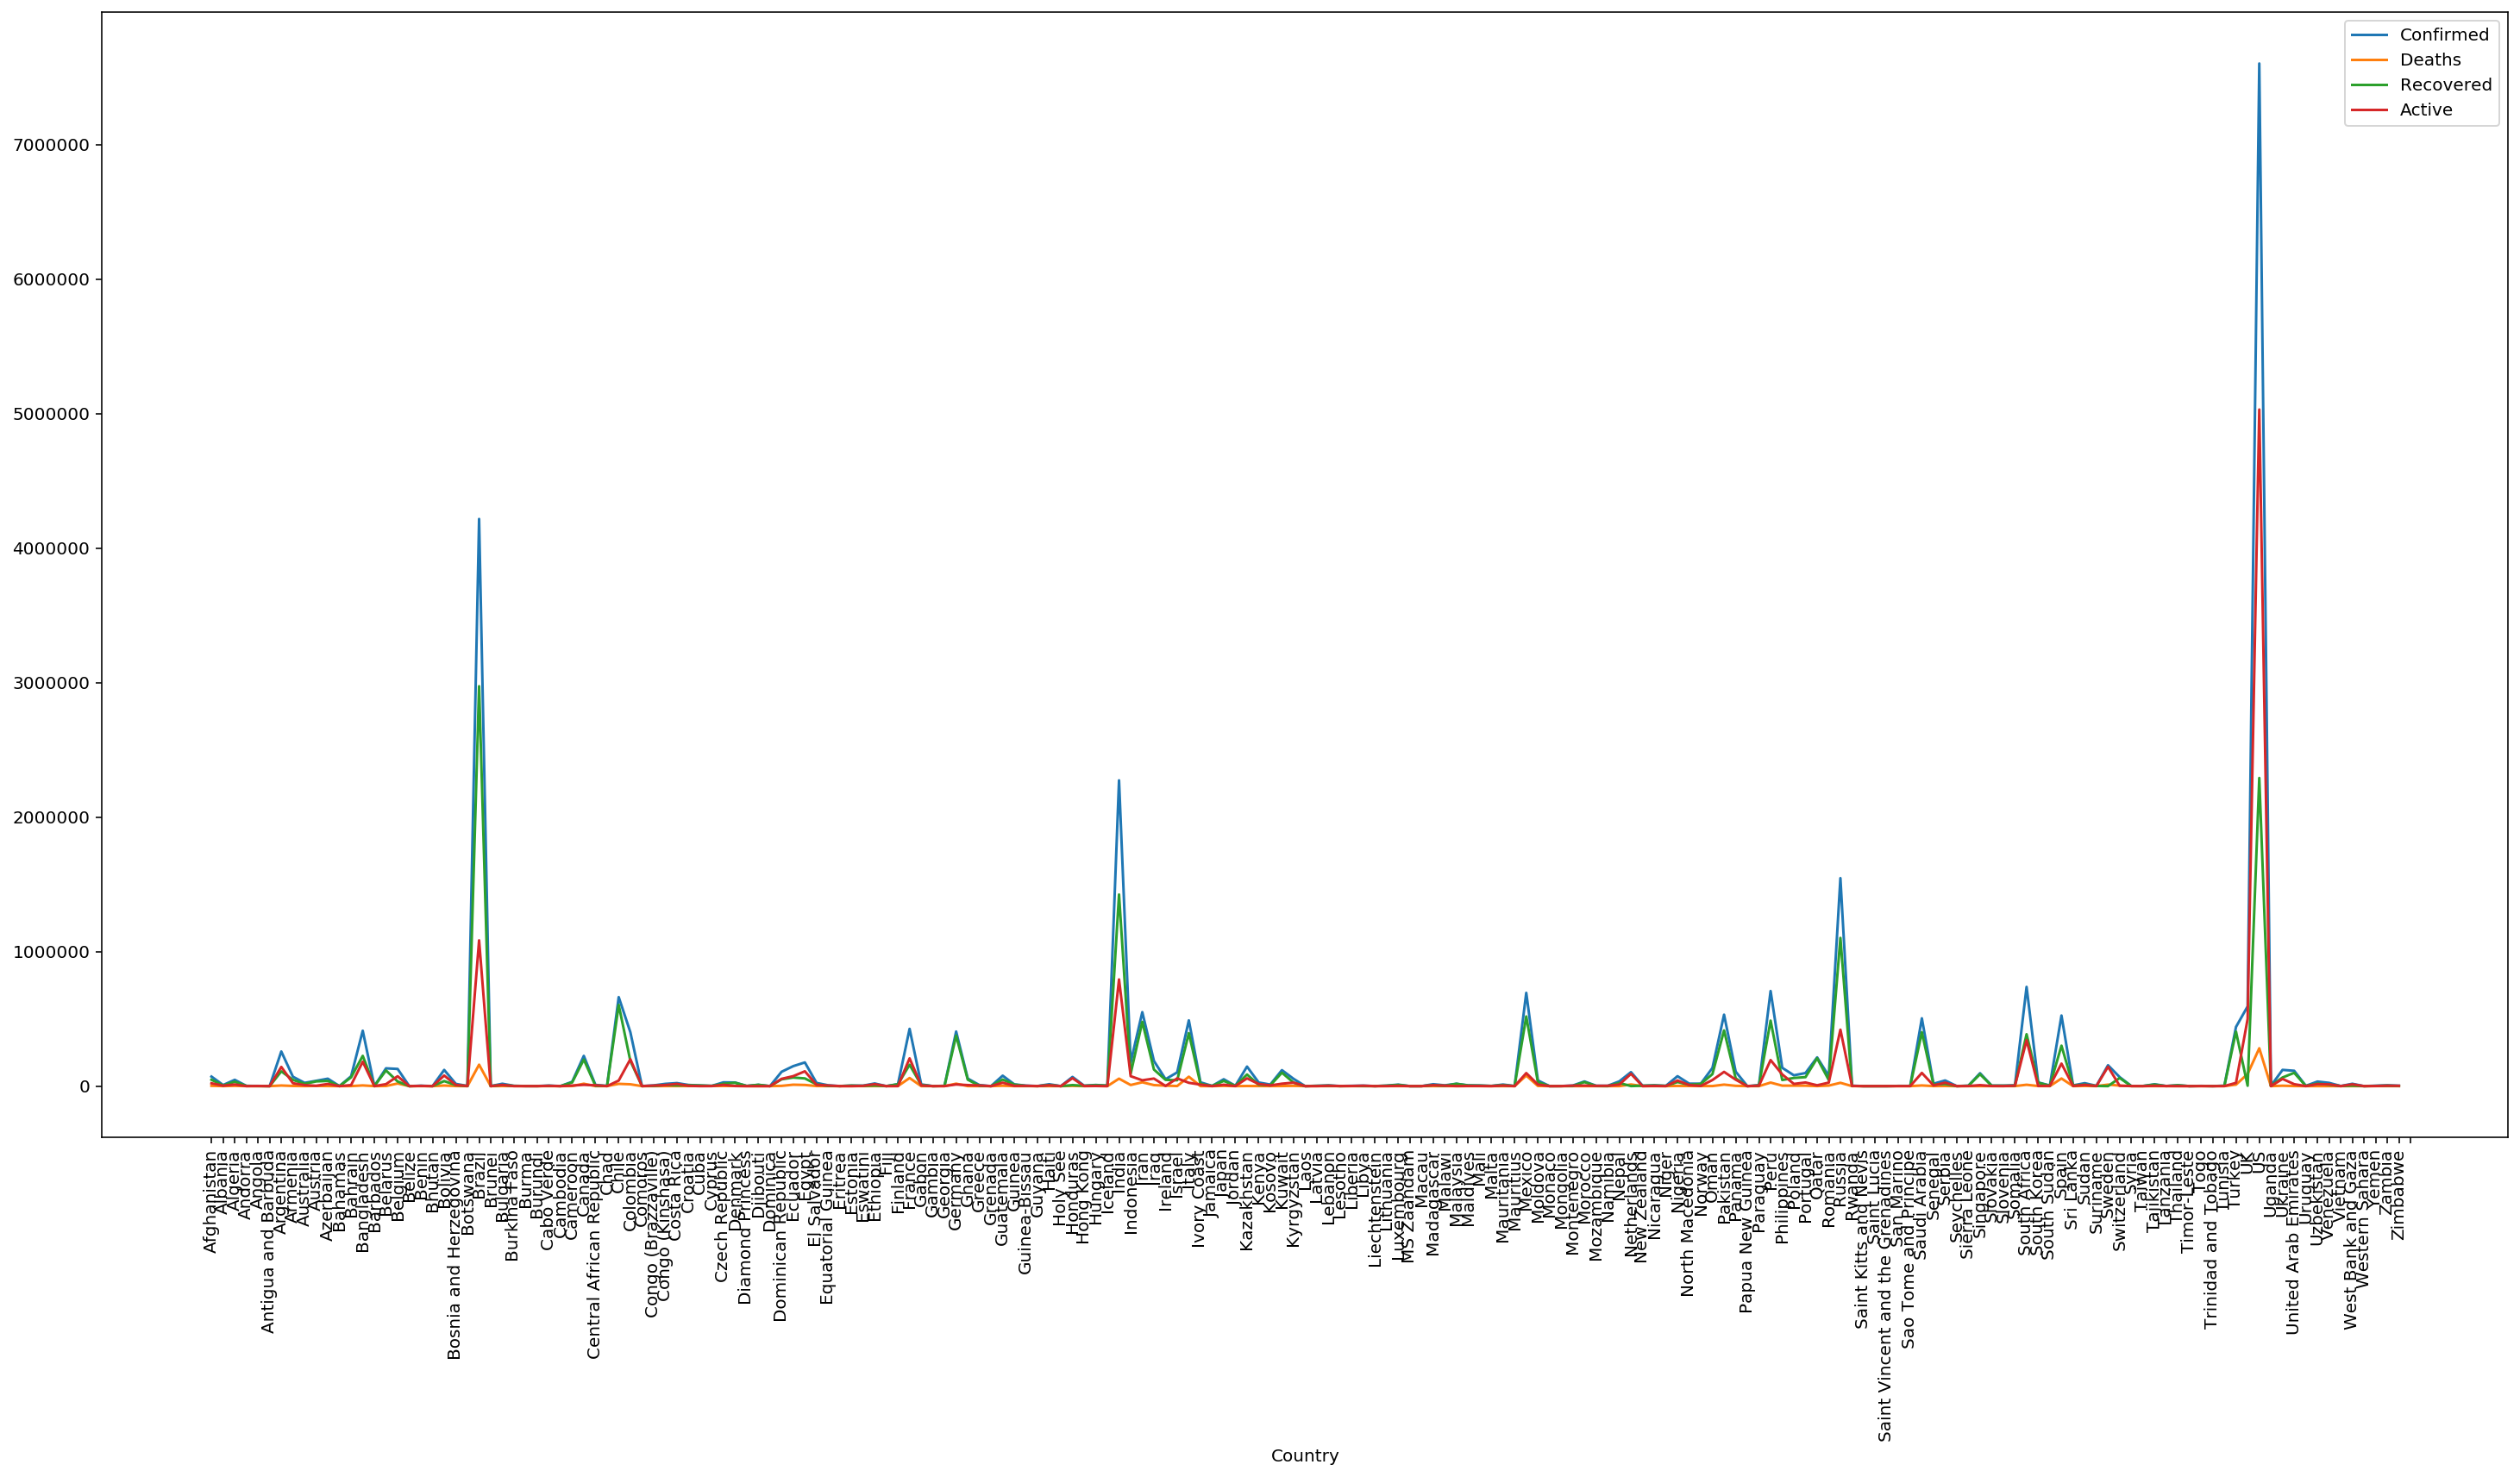

In [72]:
rest_of_world.plot('Country',['Confirmed', 'Deaths', 'Recovered', 'Active'],
                   figsize = (25, 12), fontsize = 10)
tick_labels = rest_of_world['Country']
plt.xticks(range(0, len(rest_of_world.Country) + 1), tick_labels, rotation = 90)

## nCov - Spread over time in Rest of World (Excluding China)

In [73]:
plot = make_subplots(rows = 1, cols = 3, subplot_titles= ("Confirmed", "Deaths", "Recovered", "Active"))

# to plot the spread over time, we would need the data distribution spread over time starting from 22nd Jan 2020
# So we will extract the sub-set from the original data.

rest_of_world_over_time = nCoV_data[(nCoV_data['Country'] != 'China')]
rest_of_world_over_time = rest_of_world_over_time.groupby('Date')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()

scatterPlotCasesOverTime(rest_of_world_over_time, "<b>Rest of World</b>")

C:\Users\HJ\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



#### INFERENCES
1. Rest of World has reported cases from 27 different countries outside China. Most of the cases have been reported from Thailand, Singapore and Japan.
2. Hongkong, Australia, South Korea have also reported more than 10 cases.
3. India has reported 3 cases so far.

## Sun Burst Chart

### Confirmed

In [74]:
# Confirmed
fig = px.sunburst(latest_nCoV_data.sort_values(by = 'Confirmed', ascending = False).reset_index(drop = True),
                 path = ["Country", "State"], values = "Confirmed", height = 700,
                 title = 'Number of Confirmed cases reported',
                 color_discrete_sequence = px.colors.qualitative.Prism)
fig.data[0].textinfo = 'label + text + value'
fig.show()

### Recovered

In [75]:
# Recovered
fig = px.sunburst(latest_nCoV_data.sort_values(by = 'Recovered', ascending = False).reset_index(drop = True),
                 path = ["Country", "State"], values = "Recovered", height = 700,
                 title = 'Number of Recovered cases',
                 color_discrete_sequence = px.colors.qualitative.Prism)
fig.data[0].textinfo = 'label + text + value'
fig.show()

In [76]:
# Deaths
fig = px.sunburst(latest_nCoV_data.sort_values(by = 'Deaths', ascending = False).reset_index(drop = True),
                 path = ["Country", "State"], values = "Deaths", height = 700,
                 title = 'Number of Deaths reported',
                 color_discrete_sequence = px.colors.qualitative.Prism)
fig.data[0].textinfo = 'label + text + value'
fig.show()

In [79]:
# Active
fig = px.sunburst(latest_nCoV_data.sort_values(by = 'Active', ascending = False).reset_index(drop = True),
                 path = ["Country", "State"], values = "Active", height = 700,
                 title = 'Number of Active cases reported',
                 color_discrete_sequence = px.colors.qualitative.Prism)
fig.data[0].textinfo = 'label + text + value'
fig.show()

## Country-Wise Analysis
### United States of America

In [80]:
covid_19_USA = nCoV_data[nCoV_data['Country'] == 'US']
covid_19_USA = covid_19_USA.groupby("Date")["Confirmed", "Deaths", "Recovered", "Active"].sum().reset_index()

# covid_19_USA = covid_19_USA[covid_19_USA['State'] != 'Grand Princess']
# covid_19_USA = covid_19_USA[covid_19_USA['State'] != 'Diamond Princess']
# covid_19_USA = covid_19_USA[covid_19_USA['State'] != 'Guam']

formatted_text('***USA Numbers -***')

# Data Glimpse
covid_19_USA.head()

C:\Users\HJ\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



***USA Numbers -***

Date  Confirmed  Deaths  Recovered  Active
0 2020-01-22        1.0     0.0        0.0     1.0
1 2020-01-23        1.0     0.0        0.0     1.0
2 2020-01-24        2.0     0.0        0.0     2.0
3 2020-01-25        2.0     0.0        0.0     2.0
4 2020-01-26        5.0     0.0        0.0     5.0

In [81]:
# cases over time - confirmed vs deaths
plotDailyReportedCasesOverTime(covid_19_USA, "USA")

In [82]:
# USA - Cases over time
scatterPlotCasesOverTime(covid_19_USA, "<b>USA</b>")

### South Korea

In [83]:
covid_19_SKorea = nCoV_data[nCoV_data['Country'] == 'South Korea']
covid_19_SKorea = covid_19_SKorea.groupby("Date")["Confirmed", "Deaths", "Recovered", "Active"].sum().reset_index()

formatted_text('***South Korea Numbers -***')

# Data Glimpse
covid_19_SKorea.head()

C:\Users\HJ\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



***South Korea Numbers -***

Date  Confirmed  Deaths  Recovered  Active
0 2020-01-22        1.0     0.0        0.0     1.0
1 2020-01-23        1.0     0.0        0.0     1.0
2 2020-01-24        2.0     0.0        0.0     2.0
3 2020-01-25        2.0     0.0        0.0     2.0
4 2020-01-26        3.0     0.0        0.0     3.0

In [84]:
# cases over time - confirmed vs deaths
plotDailyReportedCasesOverTime(covid_19_SKorea, "South Korea")

In [85]:
# South Korea - Cases over time
scatterPlotCasesOverTime(covid_19_SKorea, "<b>South Korea</b>")

Analysis South Korea specific data.

In [89]:
SKor_Covid_19 = pd.read_csv('../kaggle/data/datasets_527325_1332417_Case.csv')
# SKor_Covid_19.head()


### Convert 'from other city', '-' in cities to 'Others'
SKor_Covid_19['city'] = np.where(SKor_Covid_19['city'] == '-', 'Others', SKor_Covid_19['city'])
SKor_Covid_19['city'] = np.where(SKor_Covid_19['city'] == 'from other city', 'Others', SKor_Covid_19['city'])

SKor_Covid_19['latitude'] = np.where(SKor_Covid_19['latitude'] == '-', '37.00', SKor_Covid_19['latitude'])
SKor_Covid_19['longtitude'] = np.where(SKor_Covid_19['longitude'] == '-', '127.30', SKor_Covid_19['longitude'])

SKor_Covid_19

case_id          province          city  group  \
0     1000001             Seoul    Yongsan-gu   True   
1     1000002             Seoul     Gwanak-gu   True   
2     1000003             Seoul       Guro-gu   True   
3     1000004             Seoul  Yangcheon-gu   True   
4     1000005             Seoul     Dobong-gu   True   
..        ...               ...           ...    ...   
169   6100012  Gyeongsangnam-do        Others  False   
170   7000001           Jeju-do        Others  False   
171   7000002           Jeju-do        Others  False   
172   7000003           Jeju-do        Others  False   
173   7000004           Jeju-do        Others   True   

                  infection_case  confirmed   latitude   longitude  longtitude  
0                  Itaewon Clubs        139  37.538621  126.992652  126.992652  
1                        Richway        119   37.48208  126.901384  126.901384  
2            Guro-gu Call Center         95  37.508163  126.884387  126.884387  
3    Yangcheon Table Tennis Club         43  37.546061  126.874209  126.874209  
4                Day Care Center         43  37.679422  127.044374  127.044374  
..                           ...        ...        ...         ...         ...  
169                          etc         20      37.00           -      127.30  
170              overseas inflow         14      37.00           -      127.30  
171         contact with patient          0      37.00           -      127.30  
172                          etc          4      37.00           -      127.30  
173                Itaewon Clubs          1      37.00           -      127.30  

[174 rows x 9 columns]

In [93]:
SKorea_citywise_data = pd.DataFrame(SKor_Covid_19.groupby(['city'], as_index = False)['confirmed'].sum())
fig = px.bar(SKorea_citywise_data.sort_values('confirmed', ascending = False),
            x = "confirmed", y = "city",
            title = 'Total Confirmed Cases',
            text = 'confirmed', orientation = 'h',
            width = 2000, height = 700,
            range_x = [0, max(SKorea_citywise_data['confirmed']) + 2])
fig.update_traces(marker_color = '#0726ed', opacity = 0.8, textposition = 'outside')

fig.update_layout(plot_bgcolor = 'rgb(208, 236, 245)')
fig.show()

#### Reason of the Virus infection

In [95]:
SKor_patient_info = pd.read_csv("../kaggle/data/datasets_527325_1332417_PatientInfo.csv")
SKor_patient_info.head()

patient_id     sex  age country province         city  \
0  1000000001    male  50s   Korea    Seoul   Gangseo-gu   
1  1000000002    male  30s   Korea    Seoul  Jungnang-gu   
2  1000000003    male  50s   Korea    Seoul    Jongno-gu   
3  1000000004    male  20s   Korea    Seoul      Mapo-gu   
4  1000000005  female  20s   Korea    Seoul  Seongbuk-gu   

         infection_case infected_by contact_number symptom_onset_date  \
0       overseas inflow         NaN             75         2020-01-22   
1       overseas inflow         NaN             31                NaN   
2  contact with patient  2002000001             17                NaN   
3       overseas inflow         NaN              9         2020-01-26   
4  contact with patient  1000000002              2                NaN   

  confirmed_date released_date deceased_date     state  
0     2020-01-23    2020-02-05           NaN  released  
1     2020-01-30    2020-03-02           NaN  released  
2     2020-01-30    2020-02-19           NaN  released  
3     2020-01-30    2020-02-15           NaN  released  
4     2020-01-31    2020-02-24           NaN  released

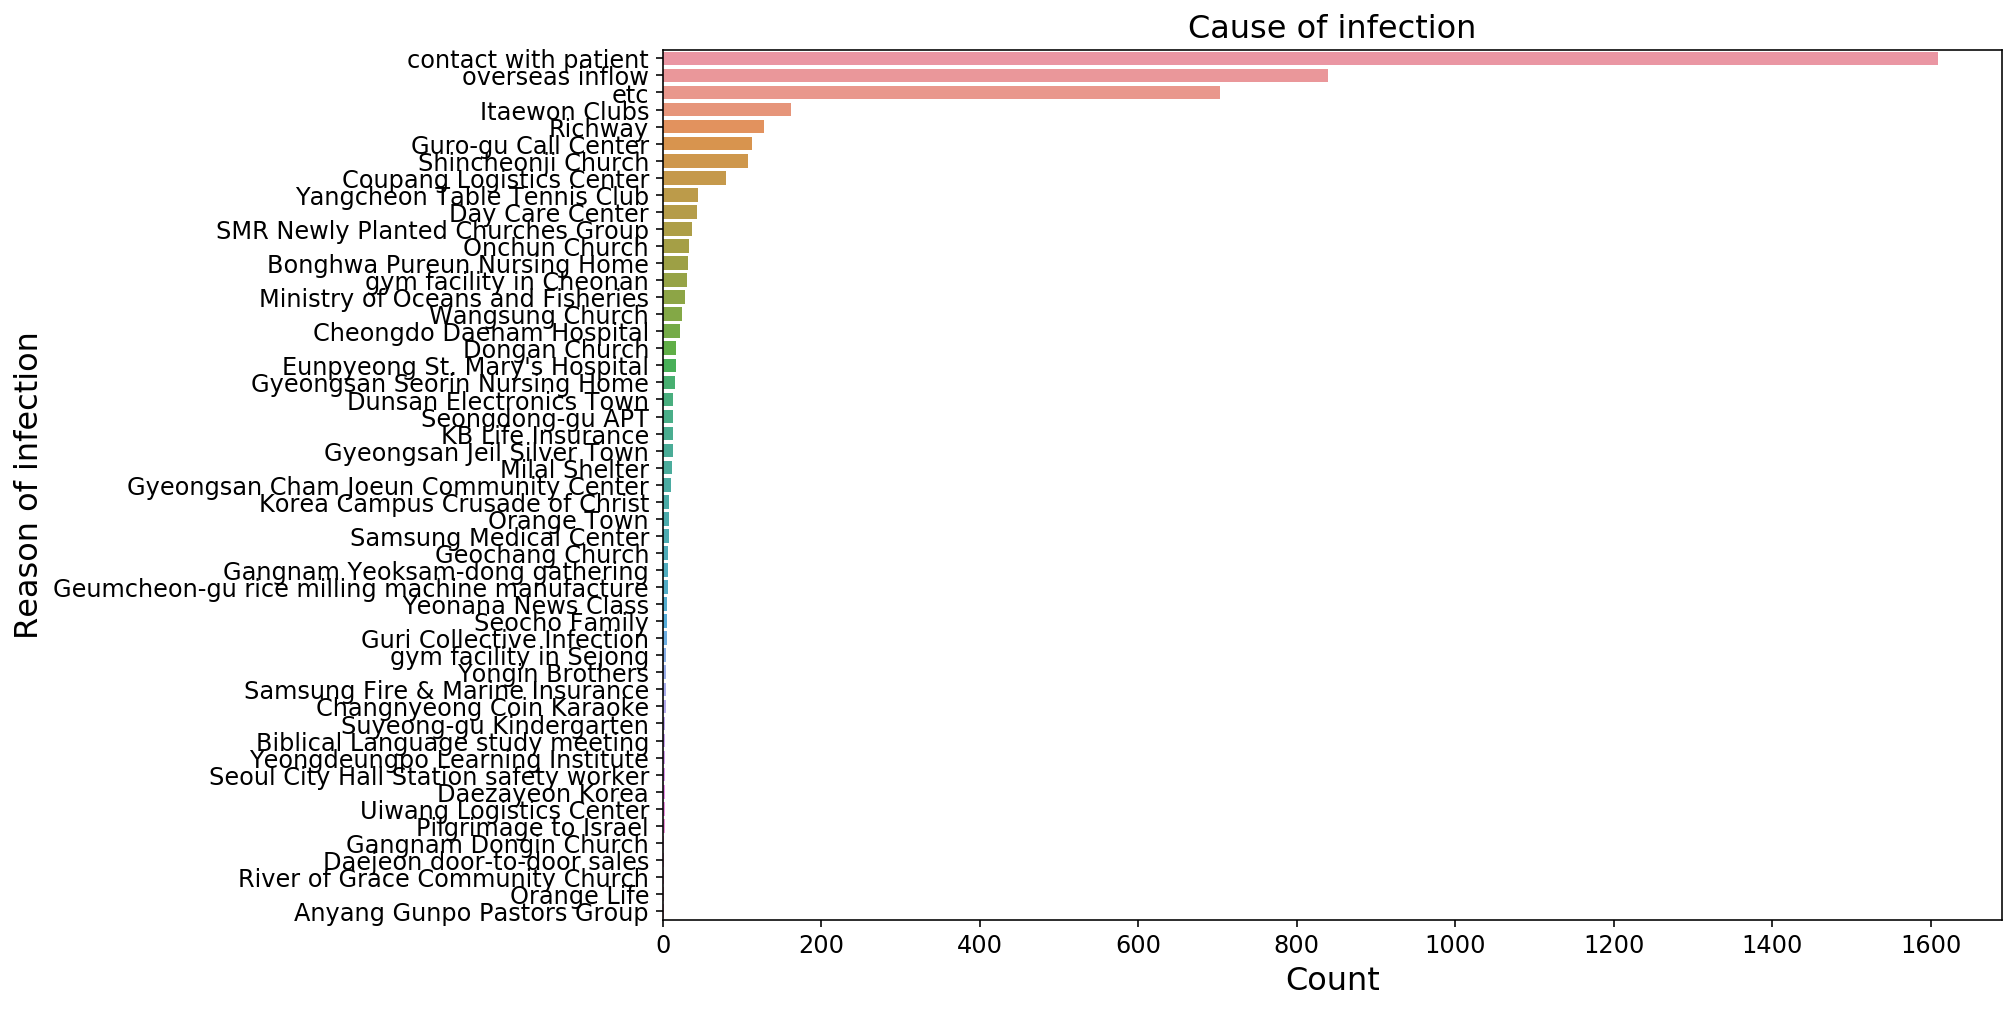

In [96]:
plt.figure(figsize = (12, 8))
sns.countplot(y = "infection_case",
             data = SKor_patient_info,
             order = list(SKor_patient_info["infection_case"].value_counts().index))
plt.title("Cause of infection", fontsize = 16)
plt.xlabel("Count", fontsize = 16)
plt.ylabel("Reason of infection", fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

That implies coming in contact with a carrier person is the major reason for the transmission of virus. This is the case not only in South Korea but also globally in other countries as well.

## Worst Hit States - Timeline Comparison...

In [98]:
fig = go.Figure()
country_list = list(top10.Country)

for i in range(len(country_list)):
    country = country_list[i]
    country_df = nCoV_data[nCoV_data.Country == country]
    country_df = pd.DataFrame(country_df.groupby("Date")["Confirmed", "Deaths", 
                                                         "Recovered", "Active"].sum().reset_index())
    
    fig.add_trace(go.Scatter(x = country_df['Date'], 
                             y = country_df['Confirmed'],
                            mode = 'lines + markers', name = country))
    
fig.update_layout(title_text = 'Top 10 Worst Affected Country - Total Confirmed Cases',
                  plot_bgcolor = 'rgb(225,230,255)')
fig.show()

C:\Users\HJ\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [99]:
fig = go.Figure()
country_list = list(top10.Country)

for i in range(len(country_list)):
    country = country_list[i]
    country_df = nCoV_data[nCoV_data.Country == country]
    country_df = pd.DataFrame(country_df.groupby("Date")["Confirmed", "Deaths", "Recovered", "Active"].sum().reset_index())

    fig.add_trace(go.Scatter(x=country_df['Date'], y=country_df['Deaths'],
                    mode='lines+markers',name=country))

fig.update_layout(title_text='Top 10 Worst Affected Country - Total Deaths Reported',plot_bgcolor='rgb(225,230,255)')
fig.show()

C:\Users\HJ\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [100]:
fig = go.Figure()
country_list = list(top10.Country)

for i in range(len(country_list)):
    country = country_list[i]
    country_df = nCoV_data[nCoV_data.Country == country]
    country_df = pd.DataFrame(country_df.groupby("Date")["Confirmed", "Deaths", "Recovered", "Active"].sum().reset_index())

    fig.add_trace(go.Scatter(x=country_df['Date'], y=country_df['Recovered'],
                    mode='lines+markers',name=country))

fig.update_layout(title_text='Top 10 Worst Affected Country - Total Recovered Cases',plot_bgcolor='rgb(225,230,255)')
fig.show()

C:\Users\HJ\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [101]:
fig = go.Figure()
country_list = list(top10.Country)

for i in range(len(country_list)):
    country = country_list[i]
    country_df = nCoV_data[nCoV_data.Country == country]
    country_df = pd.DataFrame(country_df.groupby("Date")["Confirmed", "Deaths", "Recovered", "Active"].sum().reset_index())

    fig.add_trace(go.Scatter(x=country_df['Date'], y=country_df['Active'],
                    mode='lines+markers',name=country))

fig.update_layout(title_text='Top 10 Worst Affected Country - Currrent Active Cases',plot_bgcolor='rgb(225,230,255)')
fig.show()

C:\Users\HJ\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Thanks to : https://www.kaggle.com/sauravmishra1710/covid-19-sars-cov-2-a-statistical-analysis? by Saurav Mishra